In [232]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import statsmodels.api as sm 
import warnings
import scipy.stats as spst
import scipy as sp
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer


# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')
# 오류 메세지 다시 보이게 하기
#warnings.filterwarnings(action='default')

#한글표시
# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/HANDotum.ttf'
# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트 설정
plt.rc('font', family=font_name)

In [233]:
train_na_1st=pd.read_csv('./train_na_1st.csv')
train_na_1st

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,after_Source_Category,already_borrowed
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,four,2000.0,...,0.0,NaN,NaN,NaN,NaN,zero,No,37,G,No
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,one,3500.0,...,0.0,20000.0,2.0,13.25,953.0,ten,No,29,G,No
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,four,2250.0,...,0.0,45000.0,4.0,NaN,NaN,zero,No,33,B,No
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,four,3500.0,...,0.0,92000.0,5.0,NaN,NaN,seven,No,27,B,No
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,four,10000.0,...,2500.0,50000.0,2.0,NaN,NaN,ten,No,31,B,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57441,APPT50870248519,Male,1991-03-03,2016-09-30,C10041,C,COM0000009,A,one,2400.0,...,0.0,30000.0,3.0,NaN,NaN,two,No,25,G,No
57442,APPU90955789628,Female,1983-07-31,2016-09-30,C10006,A,COM0000010,A,one,4900.0,...,0.0,NaN,NaN,NaN,NaN,ten,No,33,G,No
57443,APPV80989824738,Female,1971-01-27,2016-09-30,C10116,C,COM0045789,A,four,7190.1,...,1450.0,NaN,NaN,NaN,NaN,seven,No,45,G,Yes
57444,APPW50697209842,Female,1992-02-01,2016-09-30,C10022,B,COM0013284,C,four,1600.0,...,0.0,24000.0,4.0,35.50,943.0,two,No,24,G,No


In [234]:
train_na_1st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57446 entries, 0 to 57445
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   57446 non-null  object 
 1   Gender                               57446 non-null  object 
 2   DOB                                  57446 non-null  object 
 3   Lead_Creation_Date                   57446 non-null  object 
 4   City_Code                            57446 non-null  object 
 5   City_Category                        57446 non-null  object 
 6   Employer_Code                        57446 non-null  object 
 7   Employer_Category1                   57446 non-null  object 
 8   Employer_Category2                   57446 non-null  object 
 9   Monthly_Income                       57446 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  57446 non-null  object 
 11  Primary_Bank_Type           

In [235]:
display(train_na_1st.isna().sum())
#4개의 컬럼에서 매우많은 결측치가 확인됨 
print('전체 행',len(train_na_1st))
#결측치가 하나라도 존재하는 행의 수
print('결측치 존재',len(train_na_1st[train_na_1st[['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']].isna().any(axis=1)]))
#결측치가 하나라도 존재하는 행을 삭제하면 3만 8천개의 행이 날아감(전체의 67%)
print(37929/57446)
#따라서 결측치를 inputation하는 방안 고려

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                  0
City_Category                              0
Employer_Code                              0
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code        0
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Existing_EMI                               0
Loan_Amount                            19858
Loan_Period                            19858
Interest_Rate                          37929
EMI                                    37929
Var1                                       0
Approved                                   0
age                                        0
after_Sour

전체 행 57446
결측치 존재 37929
0.6602548480311945


In [236]:
#2차 전처리

#결측치가 없는 데이터
#'Employer_Category2'
#기존의 컬럼을 이용해 결측치를 예측해 채워갈 예정인데, 결측치가 존재하는(예측해서 대치해야 할)변수이므로 현재는 drop
train_na_1st_notNA = train_na_1st.dropna(subset=['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI'])
#결측치가 존재하는 데이터 
#any: 해당 행에 결측치가 하나라도 발견된다면 검출
train_na_1st_NA = train_na_1st[train_na_1st[['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']].isna().any(axis=1)]

In [237]:
train_na_1st_notNA
#결측치인 행을 제외해서 많이 줄어듦

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,after_Source_Category,already_borrowed
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,one,3500.0,...,0.0,20000.0,2.0,13.25,953.0,ten,No,29,G,No
6,APPK80327232033,Male,1973-03-28,2016-07-02,C10022,B,COM0030526,B,four,7500.0,...,0.0,130000.0,5.0,14.85,3082.0,ten,No,43,G,No
7,APPL20820172146,Female,1990-11-12,2016-07-03,C10003,A,COM0016738,A,four,3000.0,...,0.0,30000.0,3.0,18.25,1088.0,zero,No,25,B,No
8,APPM30977401211,Male,1977-03-03,2016-07-02,C10003,A,COM0010626,A,four,2500.0,...,0.0,66000.0,5.0,20.00,1749.0,seven,No,39,B,No
9,APPP50632654511,Male,1983-08-24,2016-07-09,C10030,B,COM0002632,B,four,2700.0,...,460.0,20000.0,5.0,18.00,508.0,seven,No,32,B,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57433,APPA20673866612,Male,1985-11-13,2016-09-30,C10057,C,COM0041137,A,four,1500.0,...,0.0,19000.0,3.0,37.00,881.0,two,No,30,G,No
57437,APPO60026095033,Female,1982-05-31,2016-09-30,C10006,A,COM0030433,A,four,3500.0,...,0.0,87000.0,5.0,15.25,2081.0,seven,No,34,G,No
57438,APPP40131207148,Male,1986-10-14,2016-09-30,C10001,A,COM0011185,B,four,13300.0,...,3400.0,20000.0,4.0,13.99,546.0,ten,No,29,G,Yes
57440,APPS20215136404,Male,1986-03-04,2016-09-30,C10002,A,COM0000003,B,two,4600.0,...,0.0,30000.0,3.0,13.00,1011.0,ten,No,30,G,No


In [238]:
train_na_1st_NA

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,after_Source_Category,already_borrowed
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,four,2000.0,...,0.0,NaN,NaN,NaN,NaN,zero,No,37,G,No
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,four,2250.0,...,0.0,45000.0,4.0,NaN,NaN,zero,No,33,B,No
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,four,3500.0,...,0.0,92000.0,5.0,NaN,NaN,seven,No,27,B,No
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,four,10000.0,...,2500.0,50000.0,2.0,NaN,NaN,ten,No,31,B,Yes
5,APPI90914237819,Female,1988-12-23,2016-07-01,C10402,C,COM0007740,A,four,7000.0,...,0.0,NaN,NaN,NaN,NaN,zero,No,27,B,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57439,APPR50947529333,Male,1991-08-01,2016-09-30,C10002,A,COM0000169,A,four,1500.0,...,0.0,24000.0,4.0,NaN,NaN,two,No,25,G,No
57441,APPT50870248519,Male,1991-03-03,2016-09-30,C10041,C,COM0000009,A,one,2400.0,...,0.0,30000.0,3.0,NaN,NaN,two,No,25,G,No
57442,APPU90955789628,Female,1983-07-31,2016-09-30,C10006,A,COM0000010,A,one,4900.0,...,0.0,NaN,NaN,NaN,NaN,ten,No,33,G,No
57443,APPV80989824738,Female,1971-01-27,2016-09-30,C10116,C,COM0045789,A,four,7190.1,...,1450.0,NaN,NaN,NaN,NaN,seven,No,45,G,Yes


In [239]:
##'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI' 결측치 처리 순서 

#대출금(Loan_Amount) 예측 후 이자율(Interest_Rate) 산출 
#대출금이 클수록 대출 이자율은 일반적으로 낮아질 수 있다. 
#대출 이자율은 대출액, 대출기간, 신용등급, 담보의 여부 등 여러 요인에 따라 결정되는데, 
#일반적으로 대출액이 크면 높은 금액에 대한 대출에 대한 위험을 상쇄하기 위해 낮은 이자율이 제공될 수 있다. 
#즉 대출금이 크면 대출기관은 높은 금액을 대출해주는 대신 안정적인 고객에게 더 낮은 이자율을 제공할 수 있다. 
#이는 대출기관이 대출을 통해 얻는 이자 수익을 대출금액에 비례해 결정하기 때문이다. 

#대출금(Loan_Amount) 예측 후 상환기간(Loan_Period) 산출 
#일반적으로 대출금이 많을 경우 월 상환액을 낮추기 위해 대출기간을 연장하는 경우가 많다. 
#대출금이 크다는 것은 대출을 받는 금액이 많다는 의미이다. 대출기간이 길수록 이런 경향은 강해진다. 

#대출금(Loan_Amount)과 이자율(Interest_Rate), 상환기간(Loan_Period) 예측 후 EMI산출 
#대출금이 클수록, 상환기간이 길수록 EMI(월 할부금)는 일반적으로 낮아질 것이다. 
#대출금이 크면 매월 상환해야 하는 금액이 높아지므로, 상환기간을 늘리면 월 할부금을 낮추기 위한 조정이 가능하다. 
#그러나 상환기간이 길어지면 총 상환액이 증가하게 되므로, 이는 장기적인 관점에서 고려해야 한다. 
#또한, 대출 상환기간이 길어질수록 이자 비용도 증가할 수 있다.

#대출금(Loan_Amount)> 이자율(Interest_Rate), 상환기간(Loan_Period) > EMI 순으로 결측치를 채운다. 

In [240]:
#1. Loan_Amount

In [241]:
train_na_1st_notNA.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'EMI', 'Var1', 'Approved', 'age', 'after_Source_Category',
       'already_borrowed'],
      dtype='object')

In [242]:
# 학습시 ID, Approved, DOB, Lead_Creation_Date 컬럼은 필요없으므로 drop 
#결측치를 예측하는데 'Loan_Amount', 'Loan_Period', 'Interest_Rate','EMI'컬럼이 결측치인 경우 똑같이 결측치인 경우가 많으므로 drop

col=set(train_na_1st_notNA.columns)-set(['ID', 'Approved', 'DOB', 'Lead_Creation_Date', 'Loan_Amount', 'Loan_Period', 'Interest_Rate','EMI'])
col

{'City_Category',
 'City_Code',
 'Contacted',
 'Customer_Existing_Primary_Bank_Code',
 'Employer_Category1',
 'Employer_Category2',
 'Employer_Code',
 'Existing_EMI',
 'Gender',
 'Monthly_Income',
 'Primary_Bank_Type',
 'Source',
 'Var1',
 'after_Source_Category',
 'age',
 'already_borrowed'}

In [243]:
# 연속형 변수(채워야할 결측치 컬럼들 제외하고 독립변수가 될 default 컬럼들)
not_obj_col = [i for i in train_na_1st_NA.columns if (train_na_1st_NA[i].dtype!='object')  & (i not in ['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',])]
not_obj_col=not_obj_col+['Loan_Amount']
not_obj_col

['Monthly_Income', 'Existing_EMI', 'age', 'Loan_Amount']

In [244]:
# 회귀분석 참고
#https://roytravel.tistory.com/355

In [1]:
#분포 확인
#연속형 값을 가진 컬럼들의 분포 확인(histogram)
#pd.options.plotting.backend = "plotly" 기본적으로 plotly를 이용해 pandas에서 그래프를 그릴 수 있게하는 옵션 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1, subplot_titles=not_obj_col)

#1부터 시작
for i, v in enumerate (not_obj_col,1):
    #print(row, col)
    #한장씩 histogram을 그림
    histo = go.Histogram(x=train_na_1st_notNA[v], name=f'Column {v}')
    fig.add_trace(histo, row=i, col=1)
    
fig.update_layout(title_text="연속형 값을 가진 컬럼들의 분포 확인", height=1200, width=1000, showlegend=False)
fig.show()

#모든 컬럼들이 왼쪽으로 치우쳤기 때문에 로그변환이 필요해보임
#또한 age변수를 제외한 나머지 변수들에서 분포가 지나치게 왼쪽으로 쏠리는 현상이 보였으므로 이상치를 처리해줄 필요가 있어보임

NameError: name 'not_obj_col' is not defined

In [246]:
#변수 변환
#log변환을 하면 0이 나오는 값은 -inf로 떠서 쓸 수 없다. 
#최소값이 0인 컬럼을 대상으로 전체에 +1을 해서 모두 0을 초과하는 양수로 만든뒤 변환 수행 

#루트변환 
# print(np.sqrt(train_na_1st_notNA[['Existing_EMI_log']]))
# print(train_na_1st_notNA['Existing_EMI_log'].skew())

#box-cox 변환
# print(spst.boxcox(train_na_1st_notNA['Existing_EMI_log']))
# print(train_na_1st_notNA['Existing_EMI_log'].skew())

#==

#https://seeyapangpang.tistory.com/34
#왼쪽으로 치우치면 log, 루트, 역수변환 
#오른쪽으로 치우치면 지수, 거듭제곱 변환 

#좌측으로 치우치면 왜도 값은 양수 
#우측으로 치우치면 왜도 값은 음수
#0에 가까운 값이 이상적

#우측으로 치우친 경우
#https://dining-developer.tistory.com/18
# y'= -y - min(-y)
# y'= -y - min(-y) + c(상수) (만약 값이 0보다 작을 경우 임의의 상수를 더해 양수로 만들어준다)

#==
#https://recipesds.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC-%EB%A1%9C%EA%B7%B8-%EB%B3%80%ED%99%98-%ED%96%88%EC%9D%84-%EB%95%8C-%EB%B2%8C%EC%96%B4%EC%A7%80%EB%8A%94-%EC%9D%BC%EA%B3%BC-%EA%B2%B0%EA%B3%BC-%ED%95%B4%EC%84%9D
#https://velog.io/@cosmicdev/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EB%A1%9C%EA%B7%B8-%EB%B3%80%ED%99%98

#변수변환은 왜 해줘야 하나요?
#회귀분석의 가정인 정규성을 만족하기 위함이며 변수변환을 통해 정규성을 높일 수 있다. 
#데이터간 편차를 줄일 수 있다.

#log변환 후 standardScaler 

#정규성 확인 
#https://signature95.tistory.com/14

#로그변환과 스케일링
#https://medium.com/@sjacks/feature-transformation-21282d1a3215

#로그변환에 대한 고찰
#https://challenge.tistory.com/46

In [247]:
#로그변환 후(회귀분석의 가정중 정규성 만족)에 표준화(단위가 다른 변수들의 단위 표준화) 
#표준화 후에 로그변환을 하면 0부터 1사이로 값이 변환되기 때문에 0인 값은 -inf로 변환된다. 

In [248]:
#변수 변환전 최소값 확인 
#train_na_1st_notNA[['Existing_EMI','age','Monthly_Income','Loan_Amount']].describe()
train_na_1st_notNA[not_obj_col].describe()
#Existing_EMI가 최소값이 0이므로 전체에 +1을 해 0을 로그변환했을 때 -inf값이 안나오게 해줄 필요 있어보임

,Monthly_Income,Existing_EMI,age,Loan_Amount
count,1.951700e+04,19517.000000,19517.000000,19517.000000
mean,6.980354e+03,212.736873,29.801353,36821.232771
std,2.789480e+05,728.425557,5.441630,28064.633554
min,8.000000e+02,0.000000,18.000000,5000.000000
25%,2.000000e+03,0.000000,26.000000,20000.000000
50%,2.630000e+03,0.000000,29.000000,30000.000000
75%,4.100000e+03,200.000000,33.000000,48000.000000
max,3.838384e+07,62626.600000,47.000000,250000.000000


In [249]:
train_na_1st_notNA['Existing_EMI']=train_na_1st_notNA['Existing_EMI']+1

In [250]:
train_na_1st_notNA[not_obj_col].describe()

,Monthly_Income,Existing_EMI,age,Loan_Amount
count,1.951700e+04,19517.000000,19517.000000,19517.000000
mean,6.980354e+03,213.736873,29.801353,36821.232771
std,2.789480e+05,728.425557,5.441630,28064.633554
min,8.000000e+02,1.000000,18.000000,5000.000000
25%,2.000000e+03,1.000000,26.000000,20000.000000
50%,2.630000e+03,1.000000,29.000000,30000.000000
75%,4.100000e+03,201.000000,33.000000,48000.000000
max,3.838384e+07,62627.600000,47.000000,250000.000000


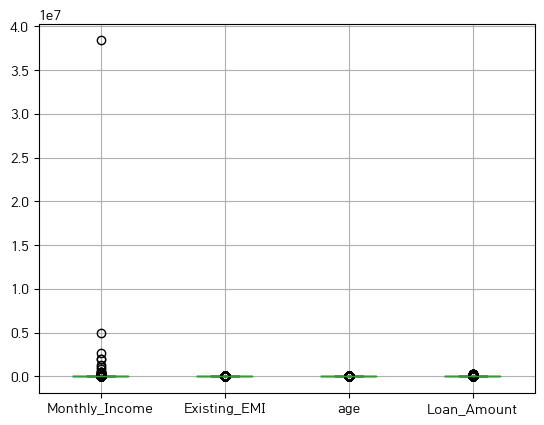

In [251]:
#boxplot 
train_na_1st_notNA[not_obj_col].boxplot()
#monthly income에서 상당히 두드러지는 이상치갸 발견되어 해당 이상치 행 삭제 후 log 변환 

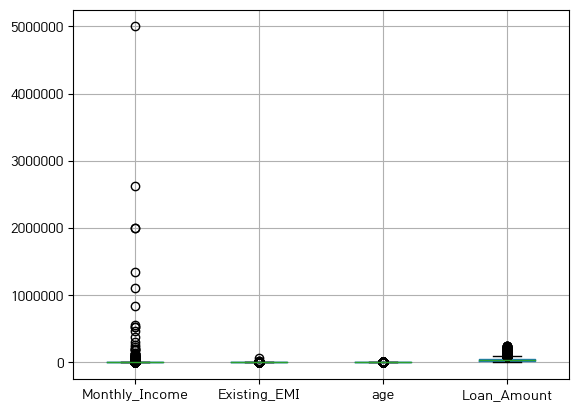

In [252]:
#이상치 1차 제거
train_na_1st_notNA=train_na_1st_notNA[train_na_1st_notNA['Monthly_Income']<train_na_1st_notNA['Monthly_Income'].max()]
train_na_1st_notNA[not_obj_col].boxplot()

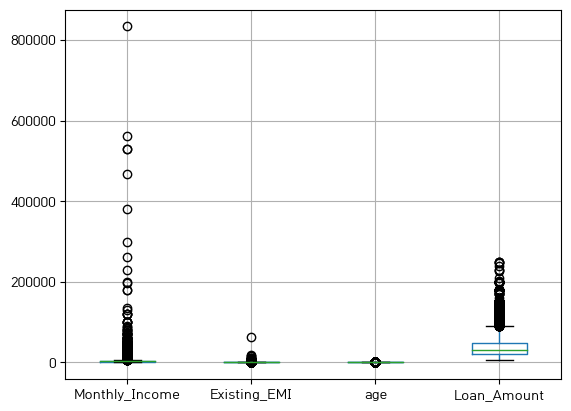

In [230]:
train_na_1st_notNA=train_na_1st_notNA[train_na_1st_notNA['Monthly_Income']<train_na_1st_notNA['Monthly_Income'].max()]
train_na_1st_notNA[not_obj_col].boxplot()

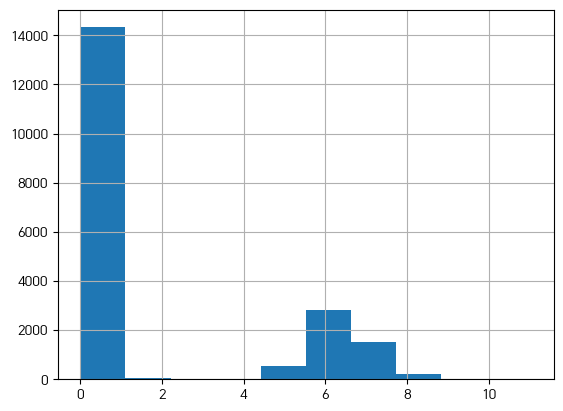

In [255]:
np.log(train_na_1st_notNA['Existing_EMI']).hist()

In [ ]:
#변환을 해도 정규분포 형태가 되지 않으므로 범주화 진행 


In [257]:
train_na_1st_notNA['Existing_EMI'],map(x: x//10)

SyntaxError: invalid syntax (3807076611.py, line 1)

In [20]:
#apply 함수 예시

# test_df = pd.DataFrame({'test':[1,2,3],'test2':[4,5,6] })
# def re_value(x):
#     return x+1
    
# test_df['N'] = test_df['test'].apply(re_value)
# test_df
#여러 컬럼을 대상으로 apply함수를 적용하면 맨 앞의 컬럼에 대해서만 함수가 적용되서 내가 의도하는대로 결과값이 안 나옴 
#따라서 개별 컬럼 하나씩 log변환 수행 

In [133]:
#1차적으로 전체 log변환을 통해 정규성 확인 (정규분포는 왜도가 0)
print('Existing_EMI')
print('전',train_na_1st_notNA['Existing_EMI'].skew())
train_na_1st_notNA['Existing_EMI_log']=np.log(train_na_1st_notNA['Existing_EMI'])
print('후',train_na_1st_notNA['Existing_EMI_log'].skew())
#Existing_EMI 확인 필요

print('age')
print('전',train_na_1st_notNA['age'].skew())
train_na_1st_notNA['age_log']=np.log(train_na_1st_notNA['age'])
print('후',train_na_1st_notNA['age_log'].skew())

print('Monthly_Income')
print('전',train_na_1st_notNA['Monthly_Income'].skew())
train_na_1st_notNA['Monthly_Income_log']=np.log(train_na_1st_notNA['Monthly_Income'])
print('후',train_na_1st_notNA['Monthly_Income_log'].skew())
#여전히 log값을 취해도 monthly_income은 치우친 상태이므로 이상치 제거를 고려

print('Loan_Amount')
print('전',train_na_1st_notNA['Loan_Amount'].skew())
train_na_1st_notNA['Loan_Amount_log']=np.log(train_na_1st_notNA['Loan_Amount'])
print('후',train_na_1st_notNA['Loan_Amount_log'].skew())

Existing_EMI
전 36.37073121909287
후 1.1370593198766208
age
전 0.8995283372431795
후 0.46532093057821683
Monthly_Income
전 133.8275478039762
후 2.0243570054702005
Loan_Amount
전 2.121641697770982
후 -0.040299724225861935


In [ ]:
#https://m.blog.naver.com/statsol/221383689303
#정규성 검정 

In [135]:
train_na_1st_notNA[not_obj_col].describe()

,Monthly_Income,Existing_EMI,age,Loan_Amount
count,1.951700e+04,19517.000000,19517.000000,19517.000000
mean,6.980354e+03,213.736873,29.801353,36821.232771
std,2.789480e+05,728.425557,5.441630,28064.633554
min,8.000000e+02,1.000000,18.000000,5000.000000
25%,2.000000e+03,1.000000,26.000000,20000.000000
50%,2.630000e+03,1.000000,29.000000,30000.000000
75%,4.100000e+03,201.000000,33.000000,48000.000000
max,3.838384e+07,62627.600000,47.000000,250000.000000


In [141]:
train_na_1st_notNA['Existing_EMI'].describe()

count    19517.000000
mean       213.736873
std        728.425557
min          1.000000
25%          1.000000
50%          1.000000
75%        201.000000
max      62627.600000
Name: Existing_EMI, dtype: float64

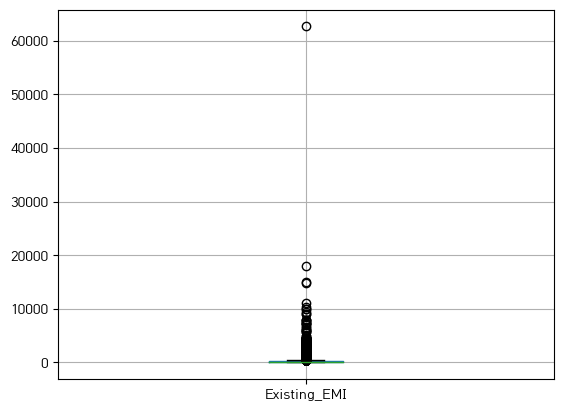

In [144]:
train_na_1st_notNA[['Existing_EMI']].boxplot()
#가장 상단에 존재하는 이상치를 제거하고 확인 

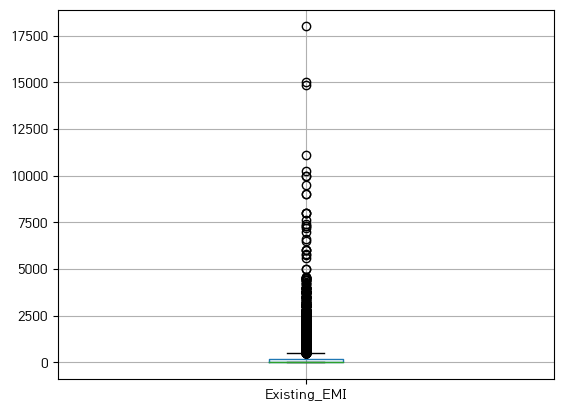

In [146]:
train_na_1st_notNA= train_na_1st_notNA[train_na_1st_notNA['Existing_EMI']<60000]
train_na_1st_notNA[['Existing_EMI']].boxplot()

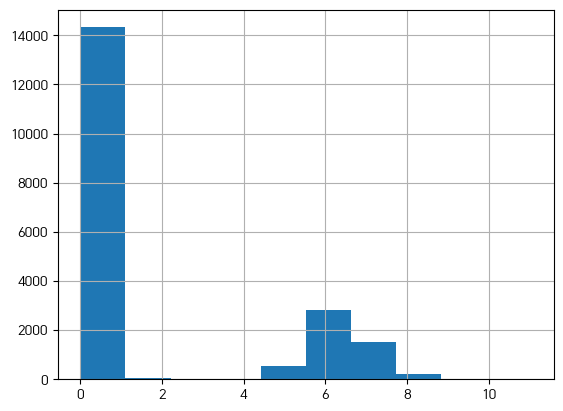

In [136]:
train_na_1st_notNA['Existing_EMI_log'].hist()

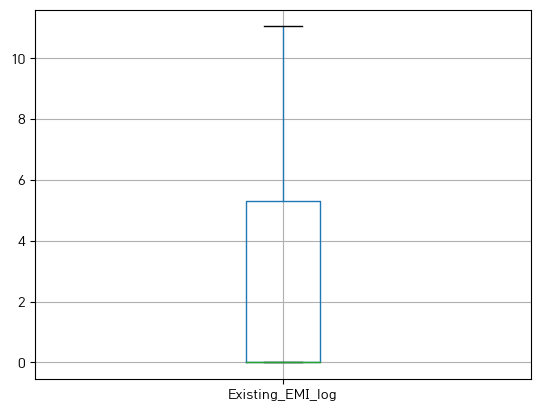

In [138]:
train_na_1st_notNA[['Existing_EMI_log']].boxplot()
#이상치가 존재하지 않는다.

count    19517.000000
mean       213.736873
std        728.425557
min          1.000000
25%          1.000000
50%          1.000000
75%        201.000000
max      62627.600000
Name: Existing_EMI, dtype: float64

In [ ]:
train_na_1st_notNA['Existing_EMI_log']

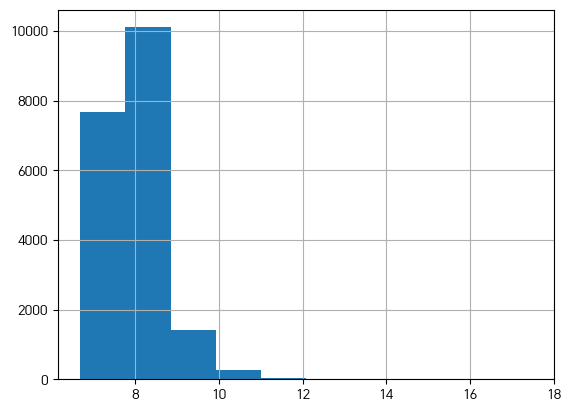

In [27]:
train_na_1st_notNA['Monthly_Income_log'].hist()

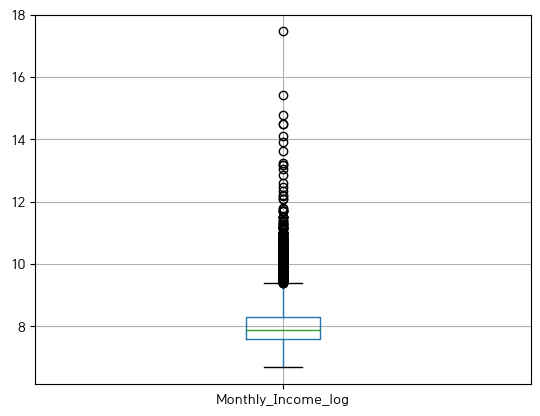

In [28]:
#Monthly Income
train_na_1st_notNA[['Monthly_Income_log']].boxplot()
#해당 변수에 이상치가 상당 부분 존재함을 확인 따라서 이상치 처리가 필요

In [29]:
#IQR기준 이상치 처리
column_data = train_na_1st_notNA['Monthly_Income']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

#이상치 상한기준, 하한기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

#이상치
print(outliers, len(outliers))

6         7500.0
21        7500.0
28       12000.0
63       10000.0
101      10050.0
          ...   
57359    30000.0
57413     8000.0
57430     8000.0
57431     8000.0
57438    13300.0
Name: Monthly_Income, Length: 1583, dtype: float64 1583


In [30]:
#이상치 행 drop
print('전체 행',len(train_na_1st_notNA))
train_na_1st_notNA.drop(index=outliers.index, inplace=True)
#이상치는 739개로 삭제해도 괜찮은것 같아 해당 행들 삭제

전체 행 19517


In [31]:
#이상치 처리 및 변환 후 재확인
print(train_na_1st_notNA['Monthly_Income'].skew())
train_na_1st_notNA['Monthly_Income_log']=np.log(train_na_1st_notNA['Monthly_Income'])
print(train_na_1st_notNA['Monthly_Income_log'].skew())
#훨씬 나아졌다. 

1.0587463415412732
0.3025031400070032


In [32]:
# 피쳐 스케일링
# 독립변수들의 값의 범위를 맞춰주기 위함 

# https://lucian-blog.tistory.com/106
# https://soo-jjeong.tistory.com/122 

# 정규화를 왜 해줘야하나요? 
# 각 변수들의 단위가 달라 이를 맞춰줘야하기 때문이다. 
# 이렇게 안해주면 단위가 큰 변수의 영향이 높게 나올 수 있다. 

# 정규화
# 정규화는 값의 범위를 0~1사이로 옮겨준다. 모든 데이터의 단위가 모두 0~1사이로 옮겨지게 해주는 것이다.
# 이러면 데이터의 컬럼들이 평등하게 0~1사이로 놓여지기 때문에 기계가 학습하기에 어느 컬럼에 중점을 두고 학습하기보단 평등하게 컬럼들을 보고 학습시킨다.

# 표준화
# 표준화는 먼저 데이터가 정규분포를 따른다는 가정하에 실시된다.(정규분포는 종모양 분포임)
# 정규분포를 따른다는 가정하에 데이터를 평균은 0, 표준편차는 1이 되도록 만들어준다. 
# 그렇기에 평균은 0이니깐 0의 근처로 많이 잡힐 것이다. 0의 좌우로 표준편차 1이 되게 분포가 될 것이다.

# 모델에 따라 정규화를 한 데이터가 값이 더 높을 수도 있고 표준화를 한 데이터가 값이 더 높을 수가 있기 때문에 둘 다 비교해 보는 것을 추천한다.

# Monthly_Income, Existing_EMI, Loan_Amount는 모두 동일한 수치단위를 공유하지만 age는 그렇지 않기 때문에 단위 정규화가 필요

from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler() 

#위에서 생성한 'Existing_EMI_log', 'age_log','Monthly_Income_log' 활용
scaled=scaler.fit_transform(train_na_1st_notNA[['Existing_EMI_log', 'age_log', 'Monthly_Income_log']])   
scaled_train_na_1st_notNA = pd.DataFrame(scaled, index=train_na_1st_notNA[['Existing_EMI_log', 'age_log', 'Monthly_Income_log']].index, columns=['Existing_EMI_log', 'age_log', 'Monthly_Income_log'])
scaled_train_na_1st_notNA.head()

,Existing_EMI_log,age_log,Monthly_Income_log
1,0.000000,0.496912,0.671714
7,0.000000,0.342272,0.601557
8,0.000000,0.805594,0.518579
9,0.762910,0.599478,0.553605
10,0.689743,0.496912,0.586034


In [33]:
#범주형 변수 확인
train_na_1st_notNA.columns
#ID나 날짜에 해당하는 DOB, Lead_Creation_Date는 의미가 없으므로 제외
obj_col=[i for i in train_na_1st_notNA.columns if (train_na_1st_notNA[i].dtype =='object') and (i not in ['ID', 'DOB', 'Lead_Creation_Date']) ]
train_na_1st_notNA[obj_col].nunique() 
#City_Code, Employer_Code, Customer_Existing_Primary_Bank_Code, Source_Category 컬럼들은 레이블이 많음
#해당 컬럼들을 모두 더미변수로 취급해 회귀모델을 적합하기엔 무리가 있어보임 

#City_Code, Employer_Code, Customer_Existing_Primary_Bank_Code는 종류가 너무 많아 더미변수에서 제외 

#그런데 Customer_Existing_Primary_Bank_Code 에 대해 은행별 대출승인률을 계산해 평균보다 높고 낮음을 기준으로 대출 기준이 까다로움이라고 간주해 새로운 변수로 만들어볼 수 있지 않을까 


#Source를 통해 구분된 값으로 나오는 Source_Category는 비슷한 맥락이므로 둘 중 한가지만 취급해도 될 것 같다. 
#이번 프로젝트의 목적은 전환율을 높이는 리드를 찾아내는 것이기 때문에 Source_Category가 아닌 Source를 취급하도록 한다.

Gender                                     2
City_Code                                477
City_Category                              3
Employer_Code                          11647
Employer_Category1                         3
Employer_Category2                         4
Customer_Existing_Primary_Bank_Code       51
Primary_Bank_Type                          2
Contacted                                  1
Source                                    22
Var1                                       5
Approved                                   2
after_Source_Category                      4
already_borrowed                           2
dtype: int64

In [34]:
#범주형 변수
#ID나 날짜에 해당하는 DOB, Lead_Creation_Date는 의미가 없으므로 제외
obj_col = [i for i in train_na_1st_notNA.columns if (train_na_1st_notNA[i].dtype =='object') and (i not in ['ID', 'DOB', 'Lead_Creation_Date', 'Approved', 'Contacted'])]
obj=train_na_1st_notNA[obj_col].describe().T
obj['비율']=train_na_1st_notNA[obj_col].describe().T['freq']/train_na_1st_notNA[obj_col].describe().T['count']
obj
#남성이 주로 대출을 신청했다. 
# A 지역의 사람들이 전체의 75% 가량 대출을 신청했다. (집값이 높은 곳인가?)
#Employer_Category1의 경우 45%가량 A인 사람이 주로 대출을 신청했다. 
#Employer_Category2의 경우 four의 경우가 85%로 대부분을 차지했다.
#Primary_Bank_Type의 경우 P가 67%로 나온 것으로 나타났다.
#Contacted는 모두 1로 나왔기 때문에 의미가 없는 컬럼이므로 삭제를 해도 될 것 같다.
#출처의 Source는 주로 S122에서 나왔고 40%가량을 차지했다.
#그리고 대출을 신청한 사람의 97%가 승인이 되지 않았다. (은행 기준이 까다로운가? 아니면 본인의 조건을 넘는 대출금을 신청한 것인가)
#은행 기준이 까다롭다는 부분은 Primary_Bank_Code에 따른 승인 여부를 보고 특정 은행 코드에서 승인율이 낮으면 비교적 까다로운 편으로 볼 수 있지 않을까 
#주거래 은행에 따라 승인률만을 보기엔 여타 변수들에 대한 영향을 통제하지 못해서 정말 해당 거래은행이 기준이 낮은 주거래은행이라고 할 수 없다고 보기 때문에 pass

#City_Code, Employer_Code, Customer_Existing_Primary_Bank_Code, Source_Category 컬럼들은 레이블이 많다.
#해당 컬럼들을 모두 더미변수로 취급해 회귀모델을 적합하기엔 무리가 있어보인다. 

#City_Code는 너무 많고 이를 통해 City_Category를 구분하기 때문에 City_Category를 사용한다. 
#Source를 통해 구분된 값으로 나오는 Source_Category는 비슷한 맥락이므로 둘 중 한가지만 취급해도 될 것 같다. 
#이번 프로젝트의 목적은 전환율을 높이는 리드를 찾아내는 것이기 때문에 Source_Category가 아닌 Source를 취급하도록 한다.

,count,unique,top,freq,비율
Gender,17934,2,Male,15527,0.865786
City_Code,17934,477,C10002,2599,0.14492
City_Category,17934,3,A,13408,0.74763
Employer_Code,17934,11647,COM0000002,152,0.008476
Employer_Category1,17934,3,A,7941,0.44279
Employer_Category2,17934,4,four,15351,0.855972
Customer_Existing_Primary_Bank_Code,17934,51,B001,4361,0.243169
Primary_Bank_Type,17934,2,P,11929,0.665161
Source,17934,22,S122,6892,0.384298
Var1,17934,5,two,5994,0.334225


In [60]:
obj_col_2nd = [c for c in obj_col if c not in ['Contacted','City_Code', 'Employer_Code', 'Customer_Existing_Primary_Bank_Code', 'Source_Category' ]]
print(obj_col_2nd)
#더미변수 변환
pd.get_dummies(train_na_1st_notNA[obj_col_2nd], drop_first=True)

['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Primary_Bank_Type', 'Source', 'Var1', 'after_Source_Category', 'already_borrowed']


,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Employer_Category2_one,Employer_Category2_three,Employer_Category2_two,Primary_Bank_Type_P,Source_S123,...,Source_S161,Source_S162,Var1_seven,Var1_ten,Var1_two,Var1_zero,after_Source_Category_B,after_Source_Category_C,after_Source_Category_G,already_borrowed_Yes
1,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
10,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57428,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
57433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
57437,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
57440,1,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [61]:
#상관관계 확인
scaled_train_na_1st_notNA.corr()
#각 독립변수간 눈에 띄는 상관관계는 보이지 않는다.

,Existing_EMI_log,age_log,Monthly_Income_log
Existing_EMI_log,1.000000,0.118687,0.112363
age_log,0.118687,1.000000,0.234451
Monthly_Income_log,0.112363,0.234451,1.000000


In [43]:
#여기부터

['Gender',
 'City_Code',
 'City_Category',
 'Employer_Code',
 'Employer_Category1',
 'Employer_Category2',
 'Customer_Existing_Primary_Bank_Code',
 'Primary_Bank_Type',
 'Contacted',
 'Source',
 'Var1',
 'Approved',
 'after_Source_Category',
 'already_borrowed']

In [63]:
#연속형 독립변수의 상관관계 확인하기 
#다중공선성 확인

scaled_train_na_1st_notNA.corr()
#정량 변수들끼리 봤을 대 대체적으로 상관관계가 없거나 약한 상관관계에 있었다.
#Loan_Amount와 Existing_EMI_log는 약한 상관관계가 있었다.
#Loan_Amount와 Monthly_Income_log는 어느정도 상관관계가 있었다.
#Loan_Amount와 age_log는 거의 상관관계가 없었다. 

#다중공선성 문제를 보이는 컬럼은 현재로선 보이지 않는다. 

,Existing_EMI_log,age_log,Monthly_Income_log
Existing_EMI_log,1.000000,0.118687,0.112363
age_log,0.118687,1.000000,0.234451
Monthly_Income_log,0.112363,0.234451,1.000000


In [ ]:
#회귀분석에서 종속변수까지 정규성을 만족해야 하는 이유는

In [ ]:
feature = scaled_train_na_1st_notNA
target = train_na_1st_notNA['']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [ ]:
#더미변수 생성 


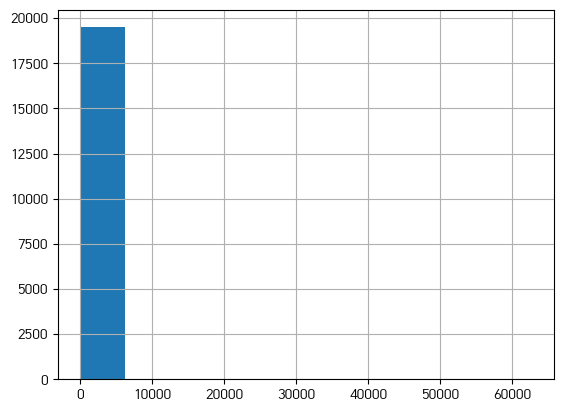

In [111]:
train_na_1st_notNA['Existing_EMI'].hist()

In [110]:
train_na_1st_notNA['Existing_EMI'].value_counts()

0.0       14300
500.0       510
400.0       293
1000.0      268
300.0       235
          ...  
644.3         1
185.9         1
432.7         1
158.9         1
754.7         1
Name: Existing_EMI, Length: 1270, dtype: int64

,count,unique,top,freq,비율
Gender,19517,2,Male,16943,0.868115
City_Code,19517,488,C10002,2883,0.147717
City_Category,19517,3,A,14684,0.75237
Employer_Code,19517,12549,COM0000002,172,0.008813
Employer_Category1,19517,3,A,8698,0.445663
Employer_Category2,19517,4,four,16698,0.855562
Customer_Existing_Primary_Bank_Code,19517,51,B001,4806,0.246247
Primary_Bank_Type,19517,2,P,13103,0.671363
Contacted,19517,1,Y,19517,1.0
Source,19517,23,S122,7586,0.388687


In [ ]:
#단위가 다른 컬럼들이 섞여있는데 
#이걸 연속형 컬럼들 전체를 대상으로 변환을 해야하는가 
# 

In [ ]:
#각 변수별 Loan_Amount와의 관계 확인 
#이 필요한가??
#anova검정이 필요??


In [ ]:
set(obj_col)-set(['City_Code','Employer_Code', 'Customer_Existing_Primary_Bank_Code'])

In [143]:
#train_na_1st_notNA[train_na_1st_notNA.columns[train_na_1st_notNA.dtypes.map(lambda x: x=='object')]].describe().transpose()
obj_col= train_na_1st_notNA[[c for c in list(col)  if train_na_1st_notNA[c].dtype =='object']]
obj_col

TypeError: 'int' object is not iterable

In [ ]:
#object형 컬럼들의 분포 확인 
from statsmodels.graphics.mosaicplot import mosaic
mosaic(train, ['Gender', 'Approved'])
plt.axhline(1- train['Approved'].mean(), color = 'r')
plt.show()

In [ ]:
#https://challenge.tistory.com/43
#다중 선형회귀는 차수를 높여서 만드는 식이므로 

#직선의 관계는 각 차원에서만 성립하고 전체적인 관계를 두고 봤을 땐 직선이 아니다 

#회귀계수로 의미를 도출해야할 때 데이터 스케일링 수행 
#최소잔차기울기도 y/x의 기울기 연산 평균으로 만들어진다.
#따라서 x의 스케일이 크면 클수록 회귀계수는 낮게 측정되어 중요도가 낮다고 평가될 것이다, 

#현재 데이터에서 각 변수들의 단위가 다르므로 다른 단위를 맞춰주기 위해 스케일링을 진행한다. 

In [ ]:
#연속형 변수들의 분포 확인 
train_na_1st_notNA

In [ ]:
#train_어쩌고 저쩌고 데이터 프레임의 Employer_Category2가 float형식인데 이걸 object화 했음에도 
#계산이 되는 것으로 봐서 
#int형으로 변경하고 float형으로 변경하는게 맞는게 아닌가 싶다. 
#참고 부탁 

# Python의 Seaborn 라이브러리에 있는 'sns.pairplot' 함수는 데이터 유형이 객체로 변경되더라도 일반적으로 소수점이 있는 데이터를 숫자(부동 소수점)로 표시합니다. 
#다른 많은 데이터 시각화 라이브러리와 마찬가지로 Seaborn은 변수의 데이터 유형을 해석하여 플롯 방법을 결정합니다.
# 데이터 유형을 "개체"로 변경하면 변수가 표시되는 방식에 영향을 미칠 수 있지만 데이터의 기본 특성은 변경되지 않습니다. 

In [ ]:
#범주형 변수들 분석 
#각 변수들의 종류를 파악한다. 
#너무 많은 종류는 계산하는데 어려움을 야기해서 그런가?
#구체적인 이유가 필요


In [ ]:
#종속변수의 아웃라이어 +

In [30]:
col

{'City_Category',
 'City_Code',
 'Contacted',
 'Customer_Existing_Primary_Bank_Code',
 'Employer_Category1',
 'Employer_Code',
 'Existing_EMI',
 'Gender',
 'Monthly_Income',
 'Primary_Bank_Type',
 'Source',
 'Source_Category',
 'Var1',
 'age'}

In [56]:
mr

,intercept,age,Existing_EMI,Monthly_Income,Var1
1,1,29,0.0,3500.0,10
6,1,43,0.0,7500.0,10
7,1,25,0.0,3000.0,0
8,1,39,0.0,2500.0,7
10,1,32,460.0,2700.0,7
...,...,...,...,...,...
69695,1,30,0.0,1500.0,2
69703,1,34,0.0,3500.0,7
69704,1,29,3400.0,13300.0,10
69706,1,30,0.0,4600.0,10


In [ ]:

#https://m.blog.naver.com/shoutjoy/221956655869
#다중회귀분석(linear)
#다항회귀분석(Polynomial)

In [ ]:
#회귀분석의가지 가정을 통해 분석모델을 조정  
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html



In [59]:
#https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression

#https://pythonfordatascienceorg.wordpress.com/linear-regression-python/
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt


In [60]:
pd.get_dummies(train_na_1st_notNA[list(col)+['Loan_Amount']], drop_first=True)

{'City_Category',
 'City_Code',
 'Contacted',
 'Customer_Existing_Primary_Bank_Code',
 'Employer_Category1',
 'Employer_Code',
 'Existing_EMI',
 'Gender',
 'Monthly_Income',
 'Primary_Bank_Type',
 'Source',
 'Source_Category',
 'Var1',
 'age'}

In [ ]:
#다중공선성 확인 
#연산 결과가 안나옴 
pd.get_dummies(train_na_1st_notNA[list(col)+['Loan_Amount']], drop_first=True).corr()

In [ ]:
#독립성 확인 

#durbin_watson
#0에서 4사이의 값이 나오는데 
#0에 가까울수록 양의 상관관계에 대한 것이고 4에 가까울수록 음의 상관관계에 대한 것이다.
#2에 가까운 것이 이상적인 값이다.. 
mr_model = 
statsmodels.stats.stattools.durbin_watson(mr_model.resid)

In [ ]:
#https://pythonfordatascienceorg.wordpress.com/linear-regression-python/

#정규성 확인 
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.jarque_bera(mr_model.resid)
#zip은 각 리스트의 위치가 일치하는 값들을 묶어서 반환해준다.
lzip(name, test)
#예시 결과로는 잔차의 정규성을 위배한다고 나옴 

#로그변환해서 확인 
df[ 'charges_log' ]  =  np . log(df[ '종속변수' ]) 
df[ '요금_로그' ] . plot(kind = 'hist' ,  
                       title =  '보험료 분배 로그' )

In [ ]:
#정규성 그래프로 확인 
#qqplot
stats.probplot(mr_model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

In [ ]:
#등분산성 
#잔차도,, 산점도(원뿔모양이 존재하면 이분산성 존재), Bruesch-Pagan, Cook-Weisberg 검정 또는 White 같은 통계 검정 사용 
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)
#p-value가 0.05보다 작게 나오면 이분산성이 존재한다는 의미이다.. 
#

In [58]:
#다중선형회귀 
#범주형 데이터 제외하고 선형회귀 
#https://kkokkilkon.tistory.com/175
mr= train_na_1st_notNA[[c for c in list(col)  if train_na_1st_notNA[c].dtype !='object']]
#0번째에 intercept라는 컬럼을 넣는다. 넣는값은 mr이라는 데이터프레임 크기의 1로 된 리스트이다.
#절편 1을 지정해준 이유는??
mr.insert(0, 'intercept', [1]*len(mr))

mr_ols = sm.OLS(train_na_1st_notNA['Loan_Amount'], mr.iloc[:,1:])
results = mr_ols.fit()
results.summary()
#각 변수의 p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Amount   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.659
Method:                 Least Squares   F-statistic:                              9424.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:49:35   Log-Likelihood:                     -2.2686e+05
No. Observations:               19517   AIC:                                  4.537e+05
Df Residuals:                   19513   BIC:                                  4.538e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age              782.6847     13.128     59.617      0.000     756.952     808.418
Existing_EMI      -3.2956      0.271    -12.153      0.000      -3.827      -2.764
Monthly_Income     0.0034      0.001      4.911      0.000       0.002       0.005
Var1            2449.0334     62.744     39.032      0.000    2326.050    2572.016
==============================================================================
Omnibus:                     8026.639   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45607.284
Skew:                           1.906   Prob(JB):                         0.00
Kurtosis:                       9.447   Cond. No.                     9.19e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
https://brunch.co.kr/@minnation/3388

In [ ]:
#https://topo314.tistory.com/62
적합한 회귀모델이 잘 만들어진 모델인지 진단이 필요하다. 
따라서 다중회귀분석, 다항회귀분석 모두 회귀분석의 가정을 따르는지 확인할 필요가 있다. 
둘 다 SSE(잔차제곱합)이 최소화되도록 회귀계수를 추정한다. 

다중회귀분석에서 잔차가 가정에 위배된 경우
-Y를 변환(log, root 등)
-이상치 제거
-다항회귀분석을 사용한다. 

다항회귀분석이 필요한 경우 
독립변수 X와 종속변수 Y가 비선형 관계일 때(산점도를 보고 판단)
잔차도를 보고 세가지 가정(평균이0분산이 sigma^2인 정규분포를 따른다, Y가 정규분포를 따른다, X와 Y가 선형관계이다.)

다항회귀 적합
일반적으로 2차항만 있는 모델 사용
-기존변수+이차항 모델은 과적합이 심해지고 변수간 correlation과 다중공선성이 커질수 있다. 
-항이 추가될수록 과적합이 잘 일어나므로 3차항부터는 신중하게 

회귀계수 축소법
ridge, lasso, elastic net 

상관관계에 대한 통계적 유의성은 상관계수 값으 얼마나 믿을 수 있는지를 알려줄 뿐 임상적 중요성을 의미하지 않는다.
결정계수는 하나값의 변동이 다른 값의 변동에 얼마나 관련이 있는지를 나타낸다. 

모두 연속변수인 경우 피어슨 상관분석
최소 하나의 변수가 서열(순서형)변수인 경우 스피어만 분석 
다른 변수들을 통제하고 변수들의 선형적 관련성을 보는 것이 편상관분석
원인의 변화가 얼마나 결과에 영향을 미치는지 보는 것이 회귀분석 


In [ ]:
#회귀분석전에 전체 변수를 대상으로 선형성을 본다.
#독립변수간 상관관계가 있는지 확인한다. 

#의문
더미변수를 두고 산점도를 그려서 보는건가
독립변수간 상관관계가 있는지 확인할 때에는 더미변수를 대상으로도 보는게 맞는가 

In [ ]:
#다중선형회귀모델(Multiple Linear Regression)과 다항회귀모델(Polynomial Regression)을 모두 고려한다.
#다중(여러 feature)//다항(곡선 그래프(여러 독립변수))
#다중 선형 회귀 모형을 활용할 때는 다음의 질문들에 관심을 둡니다.
#설명변수들 𝑋_1, …, 𝑋_𝑝 중 적어도 하나는 반응변수를 예측하는 데 유용한가?
#Y를 설명하는 데 모든 설명변수들이 도움이 되는가? 또는 설명변수들의 일부만이 유용한가?
#모델은 데이터에 얼마나 잘 맞는가?
#주어진 설명변수 값들에 대해 어떤 반응변수 값을 예측해야 하고 그 예측은 얼마나 정확한가?


In [ ]:
다중선형회귀모델에는 OLS(일반최소제곱)말고도 WLS(가중 최소 제곱), GLS(일반화된 최소제곱)
#https://velog.io/@ddangchani/%EB%94%B0%EB%A6%89%EC%9D%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0-2-Linear-Regression

In [ ]:
#범주형 독립변수와 연속형 종속변수의 다중공선성 확인 (피어슨 상관계수)
#자녀유무와 나이의 상관분석은 이연상관(biserial correlation)으로 분석 
#교차분석해서 카이제곱 하면 피어슨 상관계수가 이렇게 나옴 
#범주형 변수간 상관계수 phi, cramer's V

In [ ]:
#https://laoonlee.tistory.com/5
#전체 변수 포함한 다중회귀분석 
#회귀분석의 가정(선형성, 잔차의 독립성, 등분산성, 정규성, //다중공선성)
#잔차의 정규성: 잔차들의 분포가 정규분포 qqplot, shapiro-wilk, kolmogolov-smirnov, jarque-bara 
#오차항의 독립성:독립변수들 간 통계적 독립성 residual plot, durbin-watson, breusch-godfre's LS test, ACF
#선형성: 종속변수와 독립변수간 선형관계
#등분산성: 오차의 분산 일정 residual plot, brown-forsythe, breusch-pagan

#그래프 모양에 따라 정규화를 다르게 하는데 

In [ ]:
#변수 일부가 선형성을 만족하지 않을경우
#//선형회귀분석에서 중요한 가정으로 비선형 회귀분석에는 해당하지 않는다. 
#새로운 변수추가
#로그,지수,루트 등 변수변환(변환하고 난 뒤에는 원래대로 돌려놔야한다.)
#선형성을 만족하지 않는 변수 제거 
#선형 회귀모델을 만들고 변수선택법 사용 

#변수 일부가 독립성을 만족하지 않는경우
#//독립성은 다중회귀분석에서 중요한 기본가정으로 단순 회귀분석에서는 해당하지 않음
#//주로 시계열 자료에서만 독립성을 가정?? 
#다중공선성을 일으키는 변수제거(ex stepwise)
#다중공선성을 일으키는 변수를 다른 변수로 치환 

#등분산성을 만족하지 못하는 경우 
#Weight least square, GLS regression




In [ ]:
dw_test_statistic, _ = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson test statistic: {dw_test_statistic}')

In [22]:
#object 컬럼 더미화 필요 
#다중공선성 문제를 피하기 위해 drop_first=True 옵션을 준다. 
encoding_dummy = pd.get_dummies(train_na_1st_notNA[list(col)], drop_first=True)

In [ ]:
encoding_dummy.corr()

In [ ]:
sns.heatmap(encoding_dummy, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [93]:
x

,const,Var1,Monthly_Income,Existing_EMI,age,City_Code_C10002,City_Code_C10003,City_Code_C10004,City_Code_C10005,City_Code_C10006,...,Customer_Existing_Primary_Bank_Code_B042,Customer_Existing_Primary_Bank_Code_B043,Customer_Existing_Primary_Bank_Code_B044,Customer_Existing_Primary_Bank_Code_B045,Customer_Existing_Primary_Bank_Code_B046,Customer_Existing_Primary_Bank_Code_B047,Customer_Existing_Primary_Bank_Code_B048,Customer_Existing_Primary_Bank_Code_B049,Customer_Existing_Primary_Bank_Code_B050,Customer_Existing_Primary_Bank_Code_B055
1,1.0,10,3500.0,0.0,29,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,10,7500.0,0.0,43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0,3000.0,0.0,25,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,7,2500.0,0.0,39,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1.0,7,2700.0,460.0,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69695,1.0,2,1500.0,0.0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69703,1.0,7,3500.0,0.0,34,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69704,1.0,10,13300.0,3400.0,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69706,1.0,10,4600.0,0.0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#다중회귀분석 
x=sm.add_constant(encoding_dummy)
y=train_na_1st_notNA['Loan_Amount']
model = sm.OLS(y,x).fit()
model.summary()
#회귀분석시 

,City_Code,Employer_Category2,Var1,Lead_Creation_Date,Monthly_Income,Source,DOB,Existing_EMI,Gender,Employer_Category1,age,City_Category,Primary_Bank_Type,Contacted,Source_Category,Employer_Code,Customer_Existing_Primary_Bank_Code
1,C10003,1.0,10,2016-07-04,3500.0,S122,1986-12-07,0.0,Male,C,29,A,P,Y,G,COM0000002,B002
6,C10022,4.0,10,2016-07-02,7500.0,S122,1973-03-28,0.0,Male,B,43,B,G,Y,C,COM0030526,B003
7,C10003,4.0,0,2016-07-03,3000.0,S133,1990-11-12,0.0,Female,A,25,A,P,Y,B,COM0016738,B006
8,C10003,4.0,7,2016-07-02,2500.0,S133,1977-03-03,0.0,Male,A,39,A,G,Y,B,COM0010626,B017
10,C10030,4.0,7,2016-07-09,2700.0,S133,1983-08-24,460.0,Male,B,32,B,G,Y,B,COM0002632,B003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69695,C10057,4.0,2,2016-09-30,1500.0,S122,1985-11-13,0.0,Male,A,30,C,G,Y,G,COM0041137,B003
69703,C10006,4.0,7,2016-09-30,3500.0,S122,1982-05-31,0.0,Female,A,34,A,P,Y,G,COM0030433,B004
69704,C10001,4.0,10,2016-09-30,13300.0,S122,1986-10-14,3400.0,Male,B,29,A,P,Y,G,COM0011185,B005
69706,C10002,2.0,10,2016-09-30,4600.0,S122,1986-03-04,0.0,Male,B,30,A,P,Y,G,COM0000003,B001


In [ ]:
#object 데이터 확인 
train_na_1st_notNA.groupby(['범주형변수'])['Loan_Amount'].mean()

In [66]:
#연속형 컬럼 
chk_list = [i for i in train_na_1st_notNA.columns if train_na_1st_notNA[i].dtype in ['float64', 'int64']]
#corr계산을 위해 삭제 
chk_list.pop(-2)
chk_list

['Monthly_Income',
 'Existing_EMI',
 'Loan_Amount',
 'Loan_Period',
 'Interest_Rate',
 'EMI',
 'age']

In [ ]:
#결측치를 채우기 위한 사전단계
#0안)연속형 독립변수들과 범주형 독립변수를 모두 포함해 상관관계를 확인해본다. 
#1안)연속형 독립변수들과 연속형 종속변수간 상관관계를 확인해본다.
#2안)연속형 독립변수 1개와 종속변수 1개간 상관관계를 확인해본다.  
#3안)이어서 작성 


#범주형 변수와 연속형 종속변수간 연관성 확인  

In [ ]:
# Loan_Amount 대상 결측치 채우기 

In [67]:
train_na_1st_NA[train_na_1st_NA['Loan_Amount'].isna()==True].isna().sum()
#Loan_Amount가 결측치인 행은 Loan_period, Interest_Rate, EMI컬럼도 주로 결측치인것으로 나왔다. 
#따라서 예측모델을 만들시 Interest_Rate와 EMI컬럼을 삭제하고 모델을 생성한다. 

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                  0
City_Category                              0
Employer_Code                              0
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code        0
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                               0
Loan_Amount                            19858
Loan_Period                            19858
Interest_Rate                          19858
EMI                                    19858
Var1                                       0
Approved                                   0
age       

In [70]:
#Loan_period, Interest_Rate, EMI 제외 
chk_list0=chk_list
chk_list0.remove('Loan_Period')
chk_list0.remove('Interest_Rate')
chk_list0.remove('EMI')

ValueError: list.remove(x): x not in list

In [415]:
#위험
#sns.pairplot(train_na_1st_notNA[chk_list], corner=True)

In [69]:
#연속형 독립변수와 범주형 독립변수를 포함한 상관관계 확인 


In [ ]:
#연속형 독립변수간 상관관계 확인

In [21]:
train_na_1st_notNA[chk_list0].corr()['Loan_Amount']
#Loan_Amount와의 관계
#Employer_Category2, Monthly_Income, Existing_EMI, Var1, age는 선형적으로 연관성이 거의 없다.
#Laon_Period, Interest_Rate, Var1은 약한 상관관계가 있다.
#EMI와는 강한 상관관계가 있다.

Employer_Category2   -0.054613
Monthly_Income        0.036990
Existing_EMI         -0.018633
Loan_Amount           1.000000
Var1                  0.261632
age                   0.111640
Name: Loan_Amount, dtype: float64

In [ ]:
#상식적으로도 나이가 들수록 자녀가 있을 가능성이 높겠고, 그래서인지 자녀유무와 나이로 교차분석을 해서 카이제곱 검정을 보면 피어슨 카이제곱이 .000으로 유의하게 나옵니다.
#자녀유무(없음 = 1, 있음 = 2)와 나이를 스피어만 상관계수로 보면 r = 762***이 나옵니다.
#범주형 변수간의 상관계수는 Phi, Cramer's V 계수로 확인할 수 있습니다.
#자녀유무(0/1)와 나이(연속형변수)의 상관분석은 biserial correlation(이연상관)으로 분석합니다. 
#이때 이 값은 Pearson 상관계수와 값이 동일하게 나오므로 둘 사이의 상관계수는 .823 으로 보면 됩니다. 

#http://www.statedu.com/index.php?mid=QnA&comment_srl=86023&category=0&listStyle=webzine&document_srl=280396

In [22]:
#다중공선성 확인 
#독립 변수 간의 상관관계를 분석하고, 추정량을 분석하고자 할 때 제거해야함
#!!!다중공선성으로 인해 독립 변수들 간에 높은 상관 관계가 있으면, 각 독립 변수의 효과를 정확하게 추정하기 어렵습니다. 이는 회귀 계수의 부정확성으로 이어질 수 있습니다

from statsmodels.stats.outliers_influence import variance_inflation_factor
#VIF기준 10

independent_vars = train_na_1st_notNA[chk_list0].drop('Loan_Amount', axis=1) 
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
vif_data
#age, Employer_Category2 VIF가 높은 것으로 나왔다.
#VIF가 높은 순서대로 하나씩 없애면서 재확인

,Variable,VIF
0,Employer_Category2,12.883700
1,Monthly_Income,1.000976
2,Existing_EMI,1.130462
3,Var1,4.363124
4,age,16.388455


In [23]:
#2차 확인
independent_vars = train_na_1st_notNA[chk_list0].drop(['Loan_Amount', 'age'], axis=1) 
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
vif_data
#Employer_Category2와 Interest가 여전히 높으므로 재확인

,Variable,VIF
0,Employer_Category2,3.319024
1,Monthly_Income,1.000972
2,Existing_EMI,1.130358
3,Var1,3.464363


In [ ]:
#번외)
#공분산은 2개의 확률변수의 상관정도를 나타내는 값인데, 
#만약 2 개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하면 공분산의 값은 양수, 반대로 다른 값이 하강하는 경향을 보이면 공분산의 값은 음수가 나옵니다.


Employer_Category2
PearsonRResult(statistic=-0.05461297661972415, pvalue=2.261363476395721e-14)


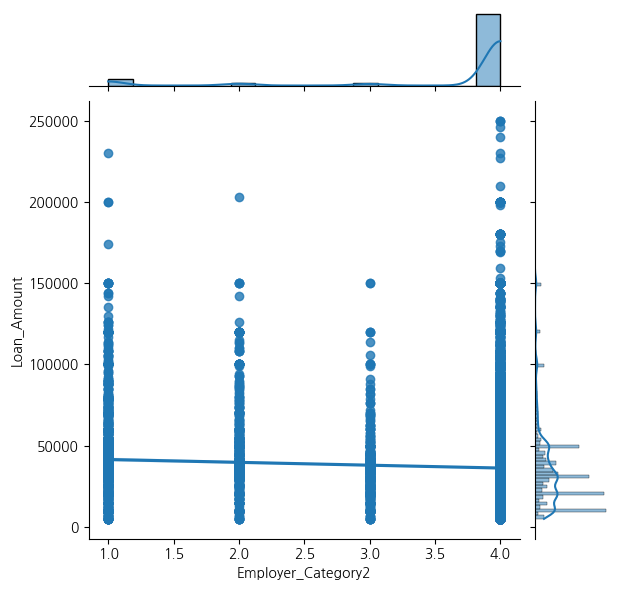

In [24]:
print(chk_list0[0])
print(spst.pearsonr(train_na_1st_notNA[chk_list0[0]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list0[0], y='Loan_Amount', kind='reg')
#유의미한 관계에 있지만 크게 의미가 있어보이진 않는다. 

In [416]:
#오래걸림 주의 
#print(chk_list0[1])
#print(spst.pearsonr(train_na_1st_notNA[chk_list0[1]], train_na_1st_notNA['Loan_Amount']))
#sns.jointplot(data= train_na_1st_notNA, x=chk_list0[1], y='Loan_Amount', kind='reg')
#유의미한 관계에 있지만 크게 의미가 있어보이진 않는다. 

Existing_EMI
PearsonRResult(statistic=-0.0186331156452038, pvalue=0.009236716693899286)


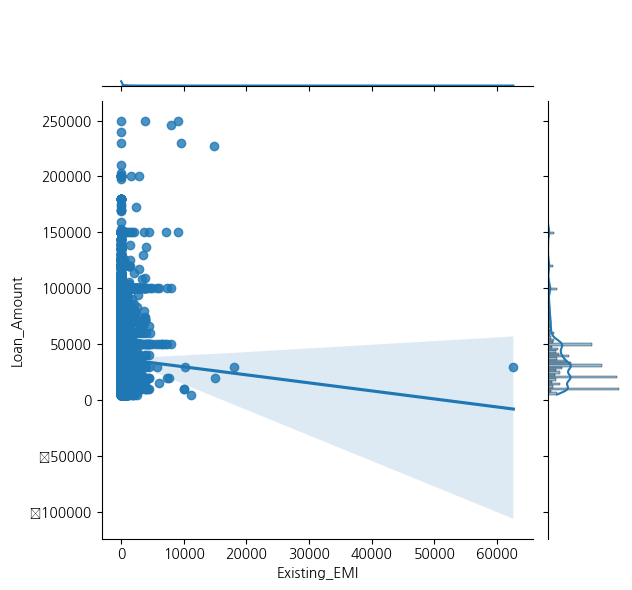

In [26]:
print(chk_list0[2])
print(spst.pearsonr(train_na_1st_notNA[chk_list0[2]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list0[2], y='Loan_Amount', kind='reg')
#유의미한 관계에 있지만 크게 의미가 있어보이진 않는다. 

Var1
PearsonRResult(statistic=0.2616318166320052, pvalue=7.285678647512292e-303)


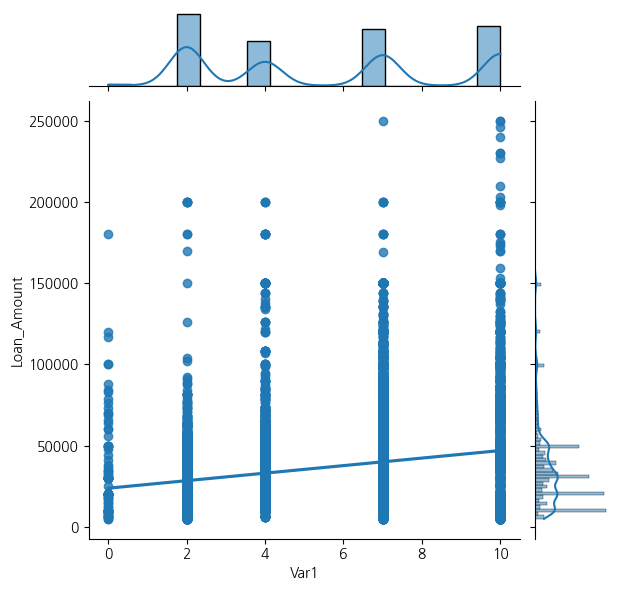

In [27]:
print(chk_list0[4])
print(spst.pearsonr(train_na_1st_notNA[chk_list0[4]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list0[4], y='Loan_Amount', kind='reg')
#Loan_Period가 길수록 Loan_Amount가 커진다. 
#약한 양의 상관관계가 있다. 

In [ ]:
#===아님 

Interest_Rate
PearsonRResult(statistic=-0.3100214524617286, pvalue=0.0)


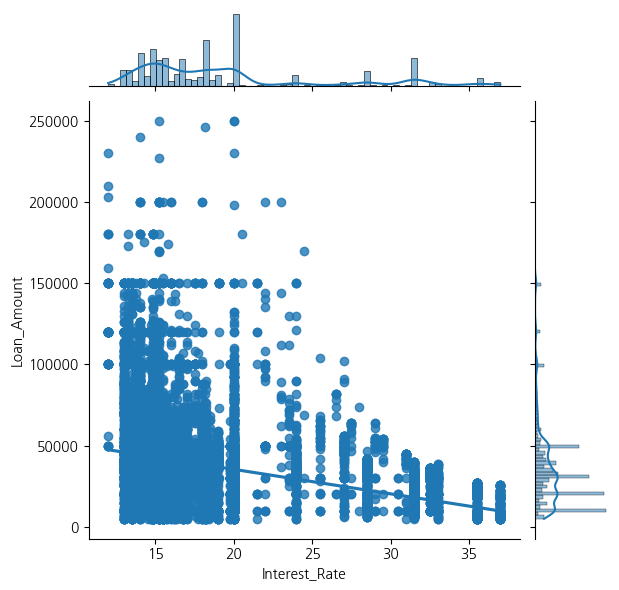

In [42]:
print(chk_list[5])
print(spst.pearsonr(train_na_1st_notNA[chk_list[5]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[5], y='Loan_Amount', kind='reg')
#Interest_Rate가 낮아지면서 Loan_Amount도 작아지는 경향이 있다. 
#약한 음의 상관관계가 있다. 

EMI
PearsonRResult(statistic=0.9156135101708064, pvalue=0.0)


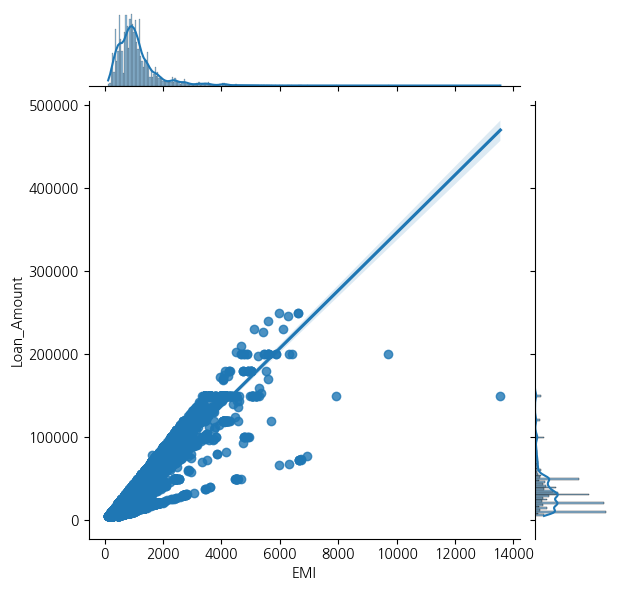

In [44]:
print(chk_list[6])
print(spst.pearsonr(train_na_1st_notNA[chk_list[6]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[6], y='Loan_Amount', kind='reg')
#EMI가 클수록 Loan_Amount가 커지는 경향이 있다.
#대부분의 EMI(월상환액+이자)는 2000이하로 나타났다. 
#강한 양의 상관관계가 있다. 
#단순히 EMI를 통해 Loan_Amount를 추정해보는것도 고려해볼만한것 같다. 

Var1
PearsonRResult(statistic=0.2616318166320052, pvalue=7.285678647512292e-303)


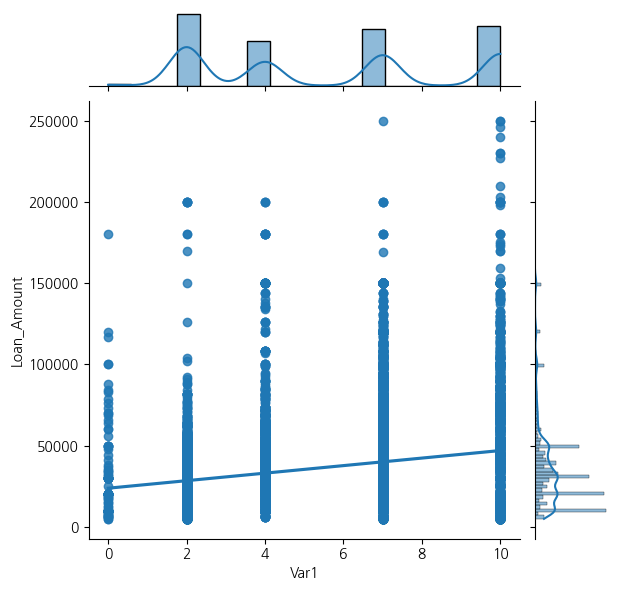

In [45]:
print(chk_list[7])
print(spst.pearsonr(train_na_1st_notNA[chk_list[7]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[7], y='Loan_Amount', kind='reg')
#Var1이 커질수록 Loan_Amount가 커지는 경향이 있다. 

age
PearsonRResult(statistic=0.11164017168429352, pvalue=3.6265018402832765e-55)


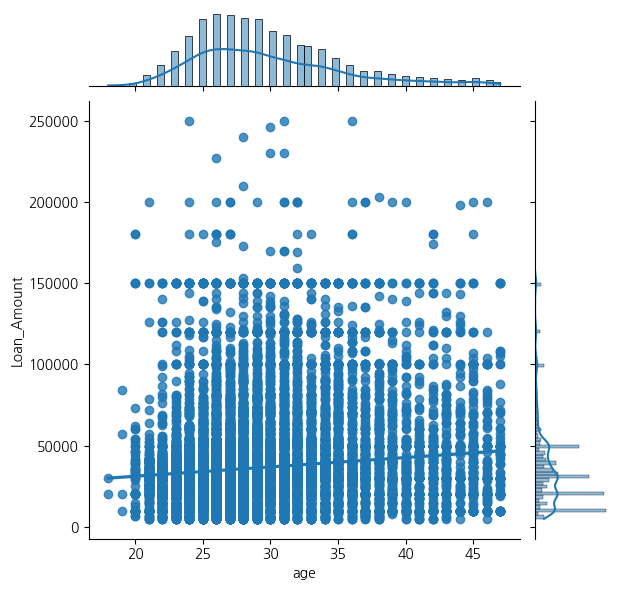

In [49]:
print(chk_list[9])
print(spst.pearsonr(train_na_1st_notNA[chk_list[9]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[9], y='Loan_Amount', kind='reg')
#20-30대에서 주로 대출을 받은 것으로 보인다. 
#연령이 높을수록 Loan_Amount가 커지는 경향이 있다. 

PearsonRResult(statistic=0.3662531087437405, pvalue=0.0)


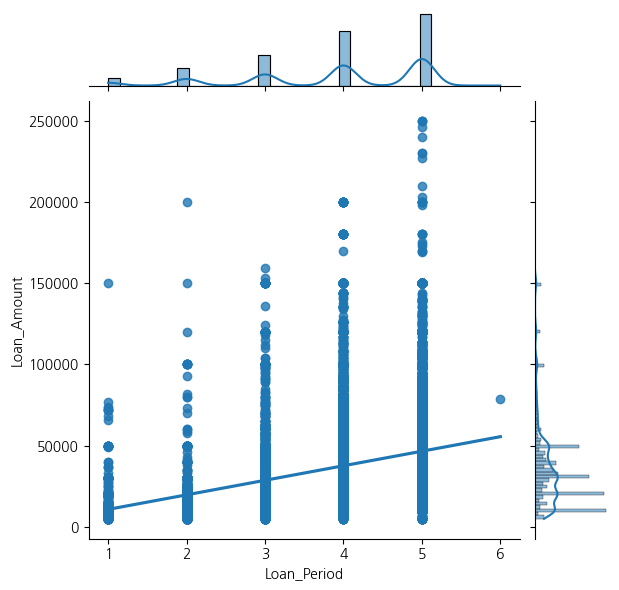

In [27]:
print(spst.pearsonr(train_na_1st_notNA[chk_list[4]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[4], y='Loan_Amount', kind='reg')
#Loan_Period가 커질수록 Loan_Amount가 커지는 경향이 있다. 
#약한 양의 상관관계가 있다. 

In [98]:
#다중회귀분석
#모든 독립변수 포함
import pandas as pd
import statsmodels.api as sm

independent_vars = train_na_1st_notNA[chk_list].drop(['Loan_Amount'], axis=1) 
dependent_var = train_na_1st_notNA['Loan_Amount']

independent_vars = sm.add_constant(independent_vars)
model = sm.OLS(dependent_var, independent_vars).fit()
print(model.summary())
#모델 설명력 0.936 

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 3.556e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:19:50   Log-Likelihood:            -2.0079e+05
No. Observations:               19517   AIC:                         4.016e+05
Df Residuals:                   19508   BIC:                         4.017e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.074e+04    466

In [97]:
#다중회귀분석
#다중공선성이 높은 독립변수 제거 
import pandas as pd
import statsmodels.api as sm

independent_vars = train_na_1st_notNA[chk_list].drop(['Loan_Amount', 'age', 'Employer_Category2'], axis=1) 
dependent_var = train_na_1st_notNA['Loan_Amount']

independent_vars = sm.add_constant(independent_vars)
model = sm.OLS(dependent_var, independent_vars).fit()
print(model.summary())
#모델 설명력 0.936
#더 적은 컬럼으로 같은 설명력을 가지는 해당 모델이 더 나아보인다. 

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 4.734e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:19:13   Log-Likelihood:            -2.0081e+05
No. Observations:               19517   AIC:                         4.016e+05
Df Residuals:                   19510   BIC:                         4.017e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.952e+04    364.545    -53.

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,age
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,37
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,33
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,27
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,...,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,31
5,APPI90914237819,Female,1988-12-23,2016-07-01,C10402,C,COM0007740,A,4.0,7000.0,...,S133,B,0.0,NaN,NaN,NaN,NaN,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69705,APPR50947529333,Male,1991-08-01,2016-09-30,C10002,A,COM0000169,A,4.0,1500.0,...,S122,G,0.0,24000.0,4.0,NaN,NaN,2,0,25
69707,APPT50870248519,Male,1991-03-03,2016-09-30,C10041,C,COM0000009,A,1.0,2400.0,...,S122,G,0.0,30000.0,3.0,NaN,NaN,2,0,25
69708,APPU90955789628,Female,1983-07-31,2016-09-30,C10006,A,COM0000010,A,1.0,4900.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,10,0,33
69709,APPV80989824738,Female,1971-01-27,2016-09-30,C10116,C,COM0045789,A,4.0,7190.1,...,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0,45


In [ ]:
#모델로 결측치 예측 
predictions = model.predict(independent_var)
predictions

In [100]:
#단순회귀분석 
independent_vars = train_na_1st_notNA['EMI'] 
dependent_var = train_na_1st_notNA['Loan_Amount']

independent_vars = sm.add_constant(independent_vars)
model = sm.OLS(dependent_var, independent_vars).fit()
print(model.summary())
#모델 설명력 838

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.012e+05
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:23:39   Log-Likelihood:            -2.0981e+05
No. Observations:               19517   AIC:                         4.196e+05
Df Residuals:                   19515   BIC:                         4.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1717.6742    145.599    -11.797      0.0

In [ ]:
#모델로 결측치 예측 
predictions = model.predict(independent_var)
predictions

In [ ]:
#spst.pearsonr(boston['crim'], boston['medv'])
#sns.jointplot(boston['crim'], boston['medv'])

In [392]:
#데이터의 불균형 확인
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=ko
#np.bincount(array)는 입력한 array의 요소별로 갯수를 count해서 반환한다. 
#Approved가 0인 값은 58202개 1인 값은 959개 
neg, pos = np.bincount(train['Approved'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
#데이터 불균형이 보임 

Examples:
    Total: 58202
    Positive: 959 (1.65% of total)



In [251]:
#test셋에도 동일하게 결측치가 존재함을 확인 
for i in test.columns:
    print(i, test[i].isna().sum(), f'--{(test[i].isna().sum()/len(test))*100}% 결측치 존재')

ID 0 --0.0% 결측치 존재
Gender 0 --0.0% 결측치 존재
DOB 3 --0.009987681859040518% 결측치 존재
Lead_Creation_Date 0 --0.0% 결측치 존재
City_Code 314 --1.0453773679129075% 결측치 존재
City_Category 314 --1.0453773679129075% 결측치 존재
Employer_Code 1605 --5.343409794586677% 결측치 존재
Employer_Category1 1605 --5.343409794586677% 결측치 존재
Employer_Category2 1695 --5.643040250357892% 결측치 존재
Monthly_Income 0 --0.0% 결측치 존재
Customer_Existing_Primary_Bank_Code 4037 --13.44009055498219% 결측치 존재
Primary_Bank_Type 4037 --13.44009055498219% 결측치 존재
Contacted 0 --0.0% 결측치 존재
Source 0 --0.0% 결측치 존재
Source_Category 0 --0.0% 결측치 존재
Existing_EMI 32 --0.10653527316309885% 결측치 존재
Loan_Amount 11871 --39.521257116223325% 결측치 존재
Loan_Period 11871 --39.521257116223325% 결측치 존재
Interest_Rate 20385 --67.86629823218031% 결측치 존재
EMI 20385 --67.86629823218031% 결측치 존재
Var1 0 --0.0% 결측치 존재


In [164]:
train['Lead_Creation_Date'].value_counts()
#주 단위로 잘라서 전환율을 확인할 수도 있고, 월단위로 잘라서 볼 수 있다. 

2016-09-29    336
2016-08-22    324
2016-08-23    308
2016-08-17    304
2016-07-04    302
             ... 
2016-07-10    121
2016-09-11    116
2016-07-24    116
2016-09-06    115
2016-08-14     84
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [165]:
#주간 데이터 기준 데이터 추출
#일요일부터 잰다 
res=train.resample(rule='1w', on='Lead_Creation_Date')
#주별 대출 신청 수
week = res.count()[['Approved']]
#주별 대출 승인 수
week1 = res.sum()[['Approved']]
#병합
week =pd.merge(week, week1, on='Lead_Creation_Date')
week

,Approved_x,Approved_y
Lead_Creation_Date,,
2016-07-03,490,9
2016-07-10,1577,40
2016-07-17,1618,23
2016-07-24,1472,29
2016-07-31,1596,30
2016-08-07,1428,43
2016-08-14,1309,25
2016-08-21,1644,46
2016-08-28,1602,41


In [166]:
week.columns=['총대출건수','승인대출건수']
fig = px.line(week)
fig.update_xaxes(tickvals=week.index, ticktext=week.index.strftime('%Y-%m-%d'))
fig.show()
#대출 건수는 7월부터 9월까지 갈 수록 늘어나고 있다. 

In [78]:
#승인대출건수 자세히보기
fig = px.line(week[['승인대출건수']])
fig.update_xaxes(tickvals=week.index, ticktext=week.index.strftime('%Y-%m-%d'))
fig.show()
#승인된 대출건수는 8월 21일부터 9월4일에 많았다. 

In [32]:
#월간 데이터 기준 데이터 추출 
res=train.resample(rule='1m', on='Lead_Creation_Date')
#월별 대출 신청 수
month = res.count()[['Approved']]
#월별 대출 승인 수
month1 = res.sum()[['Approved']]
#병합
month =pd.merge(month, month1, on='Lead_Creation_Date')
month

,Approved_x,Approved_y
Lead_Creation_Date,,
2016-07-31,21576,310
2016-08-31,22404,364
2016-09-30,25733,346


In [76]:
month.columns=['총대출건수','승인대출건수']
fig = px.line(month)
fig.update_xaxes(tickvals=month.index, ticktext=month.index.strftime('%Y-%m-%d'))
fig.show()
#대출 건수는 7월부터 9월까지 갈 수록 늘어나고 있다. 

In [79]:
#승인대출건수 자세히보기
fig = px.line(month[['승인대출건수']])
fig.update_xaxes(tickvals=month.index, ticktext=month.index.strftime('%Y-%m-%d'))
fig.show()
#다른달에 비해 유독 8월에 대출승인건수가 많았다. 

In [117]:
#주 단위 대출신청 및 승인 확인 
train['Lead_Creation_Date'][0]
#week = train['Lead_Creation_Date']
#week

Timestamp('2016-07-15 00:00:00')

In [103]:
train[['Lead_Creation_Date','DOB']]

,Lead_Creation_Date,DOB
0,2016-07-15,1979-07-23
1,2016-07-04,1986-12-07
2,2016-07-19,1982-12-10
3,2016-07-09,1989-01-30
4,2016-07-20,1985-04-19
...,...,...
69708,2016-09-30,1983-07-31
69709,2016-09-30,1971-01-27
69710,2016-09-30,1992-02-01
69711,2016-09-30,1978-06-27


In [106]:
train[train['age']<1]
#비정상적인 데이터가 존재함을 확인 
#삭제 


,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,age
43,APPI40412748047,Male,2051-07-20,2016-07-01,C10003,A,COM0015350,A,4.0,4500.0,...,S133,B,0.0,94000.0,5.0,NaN,NaN,2,0,-36
68,APPQ20489237441,Female,2060-12-21,2016-07-01,C10210,C,COM0030195,A,4.0,15150.0,...,S133,B,3750.0,NaN,NaN,NaN,NaN,10,0,-45
93,APPX20851623713,Male,2067-05-04,2016-07-01,C10004,A,COM0002676,A,4.0,6000.0,...,S122,B,1700.0,30000.0,3.0,14.85,1038.0,10,0,-51
101,APPH70914946713,Female,2062-11-10,2016-07-01,C10519,C,COM0036037,A,4.0,5000.0,...,S133,E,950.7,20000.0,2.0,NaN,NaN,7,0,-47
103,APPL10781772115,Female,2059-03-31,2016-07-01,C10018,C,COM0050107,A,4.0,1800.0,...,S133,C,0.0,40000.0,5.0,20.00,1060.0,2,0,-43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69651,APPD30192127706,Female,2067-01-25,2016-09-30,C10002,A,COM0029393,A,4.0,9000.0,...,S122,G,0.0,150000.0,4.0,13.99,4098.0,4,0,-51
69677,APPG30032778635,Male,2067-10-15,2016-09-30,C10001,A,COM0033268,A,4.0,8000.0,...,S122,G,0.0,10000.0,2.0,14.85,484.0,10,0,-52
69699,APPE90634962005,Male,2057-11-01,2016-09-30,C10008,A,COM0000465,C,4.0,4500.0,...,S122,G,0.0,81000.0,4.0,14.85,2248.0,4,0,-42
69700,APPG50483428223,Female,2064-01-02,2016-09-30,C10078,C,COM0002784,A,4.0,5152.4,...,S122,G,2364.8,NaN,NaN,NaN,NaN,0,0,-48


In [107]:
#date=

#(train['Lead_Creation_Date']-train['DOB'])/365
[int(str(i)[:2])-1 if for i in (train['Lead_Creation_Date']-train['DOB'])/365]

#나이계산
#int(str(date[0])[:2])-1
##date=pd.to_datetime(date, format='%d/%m/%y')


ValueError: invalid literal for int() with base 10: 'Na'

In [70]:
#DOB와 Lead_Creation_Date컬럼을 이용해 나이를 추측한다. 


,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,1983-07-31,2016-09-30,C10006,A,COM0000010,A,1.0,4900.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,10,0
69709,APPV80989824738,Female,1971-01-27,2016-09-30,C10116,C,COM0045789,A,4.0,7190.1,...,N,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0
69710,APPW50697209842,Female,1992-02-01,2016-09-30,C10022,B,COM0013284,C,4.0,1600.0,...,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0
69711,APPY50870035036,Male,1978-06-27,2016-09-30,C10002,A,COM0000098,C,3.0,9893.0,...,Y,S122,G,1366.0,80000.0,5.0,NaN,NaN,10,0


In [5]:
#AARRR처럼 어떻게 변화하는지 확인
#각 단계변화를 기준으로 어떤 범주에서 어떤 범주로 변화하며 진행되는지 확인 
#현재 데이터로는 불가능해서 더미 데이터를 생성해야 한다. 

#각 ID별 퍼널을 보기엔 데이터가 부족해서 pass

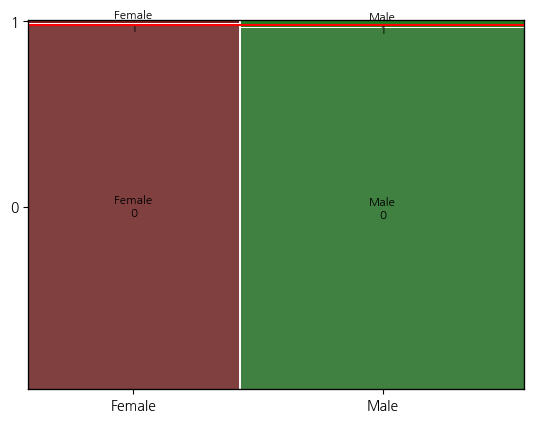

In [53]:
#지원자의 성별과 승인 여부 관계확인 
from statsmodels.graphics.mosaicplot import mosaic
mosaic(train, ['Gender', 'Approved'])
plt.axhline(1- train['Approved'].mean(), color = 'r')
plt.show()
#성별에 따른 대출 승인여부는 관련이 있어보이지는 않는다. 

In [ ]:
mosaic(train, ['', 'Approved'])
plt.axhline(1- train['Approved'].mean(), color = 'r')
plt.show()

In [ ]:
#각 채널별 승인과 미승인 케이스로 나눠 특징 확인 
#sns.hue 비슷하게 
fig = px.bar(train, x="Approved", y="", color="Approved", facet_col='Source')
#,              line_group="Approved")
fig.show()

In [5]:
#한번 서비스를 문의했던 고객이 또 찾는 경우를 본다. 

from collections import Counter
# for i,v in Counter(train['ID']).items():
#     if v>1:
#         print(i)
#모든 고객은 하나의 row만 가짐 

In [6]:
#source
#source_category 
train.loc[:,['ID','Source','Source_Category']]

,ID,Source,Source_Category
0,APPC90493171225,S122,G
1,APPD40611263344,S122,G
2,APPE70289249423,S143,B
3,APPF80273865537,S143,B
4,APPG60994436641,S134,B
...,...,...,...
69708,APPU90955789628,S122,G
69709,APPV80989824738,S122,G
69710,APPW50697209842,S122,G
69711,APPY50870035036,S122,G


In [7]:
#df형식이 counter에 들어가면 의도대로 나오지 않는다. 
#series형식으로 넣는다.
dict((Counter(train.loc[train['Approved']==1,'Source']))).keys()

dict_keys(['S143', 'S133', 'S134', 'S122', 'S159', 'S151', 'S127', 'S144', 'S157', 'S153', 'S161', 'S137', 'S158', 'S141'])

In [8]:
#각 리드 출처 채널별, 리드 출처 채널의 구분별 누적비율 확인 

#(대출성공 실패 구분안함)리드출처별 대출신청액 확인
chk=pd.DataFrame({'리드출처': dict((Counter(train['Source']))).keys(), '리드출처별_대출신청수': dict((Counter(train['Source']))).values()})
#(대출에 성공한 케이스 기준)리드출처별 대출신청액 확인
#chk_1=pd.DataFrame({'리드출처': dict((Counter(train[train['Approved']==1,'Source']))).keys(), '리드출처별_대출신청액': dict((Counter(train[train['Approved']==1,'Source']))).values()})
chk_1=pd.DataFrame({'리드출처': dict((Counter(train.loc[train['Approved']==1,'Source']))).keys(), '리드출처별_대출신청수': dict((Counter(train.loc[train['Approved']==1,'Source']))).values()})
#(대출성공 실패 구분안함)리드출처 카테고리별 대출신청액 확인
chk2=pd.DataFrame({'리드출처_카테고리': dict((Counter(train['Source_Category']))).keys(), '리드카테고리별_대출신청수': dict((Counter(train['Source_Category']))).values()})
#(대출에 성공한 케이스 기준)리드출처 카테고리별 대출신청액 확인
chk2_1=pd.DataFrame({'리드출처_카테고리': dict((Counter(train.loc[train['Approved']==1,'Source_Category']))).keys(), '리드카테고리별_대출신청수': dict((Counter(train.loc[train['Approved']==1,'Source_Category']))).values()})

#내림차순 정렬
chk.sort_values('리드출처별_대출신청수', ascending=False, inplace=True)
chk_1.sort_values('리드출처별_대출신청수', ascending=False, inplace=True)
chk2.sort_values('리드카테고리별_대출신청수', ascending=False, inplace=True)
chk2_1.sort_values('리드카테고리별_대출신청수', ascending=False, inplace=True)
#index reset
chk.reset_index(inplace=True)
chk_1.reset_index(inplace=True)
chk2.reset_index(inplace=True)
chk2_1.reset_index(inplace=True)

#각 데이터별로 누적비율 구하기
for i in range(len(chk)):
    chk.loc[i,'누적비율']= sum(chk.loc[0:i+1,'리드출처별_대출신청수'])/sum(chk['리드출처별_대출신청수'])
    if i < len(chk_1):
        chk_1.loc[i,'누적비율']= sum(chk_1.loc[0:i+1,'리드출처별_대출신청수'])/sum(chk_1['리드출처별_대출신청수'])
    if i < len(chk2):
        chk2.loc[i,'누적비율']= sum(chk2.loc[0:i+1,'리드카테고리별_대출신청수'])/sum(chk2['리드카테고리별_대출신청수'])
    if i < len(chk2_1):
        chk2_1.loc[i,'누적비율']= sum(chk2_1.loc[0:i+1,'리드카테고리별_대출신청수'])/sum(chk2_1['리드카테고리별_대출신청수'])

In [9]:
#전체 대상(대출승인 및 미승인)
chk
#전체대상으로 대출 건수를 봤을 때 90%의 고객이 상위 3개의 리드출처에서 나왔다.

,index,리드출처,리드출처별_대출신청수,누적비율
0,0,S122,30941,0.786338
1,3,S133,23877,0.850516
2,4,S159,4474,0.900435
3,1,S143,3480,0.922611
4,6,S127,1546,0.942694
5,5,S137,1400,0.957727
6,2,S134,1048,0.966635
7,13,S161,621,0.974797
8,10,S151,569,0.982069
9,16,S157,507,0.987850


In [10]:
#대출 승인 케이스만
chk_1
#대출승인자들은 상위 2개의 채널을 통해 나왔다. 

,index,리드출처,리드출처별_대출신청수,누적비율
0,3,S122,463,0.836275
1,1,S133,390,0.906863
2,0,S143,72,0.945098
3,2,S134,39,0.975490
4,4,S159,31,0.987255
5,6,S127,12,0.990196
6,5,S151,3,0.993137
7,8,S157,3,0.995098
8,10,S161,2,0.996078
9,7,S144,1,0.997059


In [32]:
#(리드출처 별) 전체 대비 각 리드출처별 대출신청수 비율 확인 
chk_stack=chk[['리드출처','리드출처별_대출신청수']].merge(chk_1[['리드출처','리드출처별_대출신청수']], on='리드출처')

chk_stack.columns=['리드출처','전체_대출신청수','대출_승인수']
chk_stack['대출_미승인_수'] = chk_stack['전체_대출신청수']-chk_stack['대출_승인수']
chk_stack['대출승인비율']=chk_stack['대출_승인수']/chk_stack['전체_대출신청수']*100

chk_stack

,리드출처,전체_대출신청수,대출_승인수,대출_미승인_수,대출승인비율
0,S122,30941,463,30478,1.496396
1,S133,23877,390,23487,1.633371
2,S159,4474,31,4443,0.692892
3,S143,3480,72,3408,2.068966
4,S127,1546,12,1534,0.776197
5,S137,1400,1,1399,0.071429
6,S134,1048,39,1009,3.721374
7,S161,621,2,619,0.322061
8,S151,569,3,566,0.527241
9,S157,507,3,504,0.591716


In [35]:
px.bar(chk_stack, x='리드출처', y=['대출_미승인_수','대출_승인수'])
#대출신청이 많은 리드채널에서는 대출 승인도 비교적 많았다. 

In [37]:
#그래프 그리기
fig = px.box(x=chk_stack['리드출처'], y=chk_stack['대출승인비율'])
fig.add_hline(chk_stack['대출승인비율'].mean()) 
fig.show()
#평균이상과 이하로 나눠 대출승인이 많은 리드채널과 대출승인이 적은 리드채널로 볼 수 있다. 

In [41]:
#각 채널별 대출이 적은 케이스와 많은 케이스 그룹 특징 확인 
upper = chk_stack[chk_stack['대출승인비율']>=chk_stack['대출승인비율'].mean()]
under = chk_stack[chk_stack['대출승인비율']<chk_stack['대출승인비율'].mean()]

In [42]:
upper

,리드출처,전체_대출신청수,대출_승인수,대출_미승인_수,대출승인비율
0,S122,30941,463,30478,1.496396
1,S133,23877,390,23487,1.633371
3,S143,3480,72,3408,2.068966
6,S134,1048,39,1009,3.721374
13,S141,46,1,45,2.173913


In [43]:
under

,리드출처,전체_대출신청수,대출_승인수,대출_미승인_수,대출승인비율
2,S159,4474,31,4443,0.692892
4,S127,1546,12,1534,0.776197
5,S137,1400,1,1399,0.071429
7,S161,621,2,619,0.322061
8,S151,569,3,566,0.527241
9,S157,507,3,504,0.591716
10,S153,403,1,402,0.248139
11,S144,243,1,242,0.411523
12,S158,167,1,166,0.598802


In [14]:
#df생성
mid_df=pd.DataFrame(train.loc[train['Approved']==1,['Source','Loan_Amount']].groupby('Source').agg(['count','sum','mean']))['Loan_Amount'].sort_values('mean', ascending=False)
mid_df
#각 채널의 총 대출액을 봤을 때 대출자 수가 적어도 상당히 많은 대출액을 받는 케이스가 종종 보였다. 

,count,sum,mean
Source,,,
S153,1,140000.0,140000.000000
S141,1,120000.0,120000.000000
S127,10,625000.0,62500.000000
S159,25,1373000.0,54920.000000
S134,31,1648000.0,53161.290323
S133,323,16259000.0,50337.461300
S161,2,100000.0,50000.000000
S122,388,18681000.0,48146.907216
S143,58,2597000.0,44775.862069


In [15]:
#리드출처별 대출 총 승인액, 인당 평균 대출승인액, 대출 총 승인액 대비 비율
for i in mid_df.index:
    mid_df.loc[i,'대출_총_승인액_대비_비율']=mid_df.loc[i,'sum']/mid_df['sum'].sum()*100
mid_df.sort_values('대출_총_승인액_대비_비율', ascending=False)
#대출금의 83%는 두개의 채널을 통해 나온다. 

#그렇다면 다른 채널에서 대출이 왜 적은지 확인해볼 필요가 있다.
#리드를 높이는 것을 목적으로 한다고 했는데 2개의 채널을 제외한 나머지 채널들에 대해 확인해볼 필요가 있다. 

,count,sum,mean,대출_총_승인액_대비_비율
Source,,,,
S122,388,18681000.0,48146.907216,44.750269
S133,323,16259000.0,50337.461300,38.948377
S143,58,2597000.0,44775.862069,6.221104
S134,31,1648000.0,53161.290323,3.947778
S159,25,1373000.0,54920.000000,3.289017
S127,10,625000.0,62500.000000,1.497185
S153,1,140000.0,140000.000000,0.335370
S151,3,132000.0,44000.000000,0.316206
S141,1,120000.0,120000.000000,0.287460


In [33]:
#(리드출처의 카테고리별) 전체 대비 각 리드출처별 대출신청수 비율 확인 
chk2_stack=chk2[['리드출처_카테고리','리드카테고리별_대출신청수']].merge(chk2_1[['리드출처_카테고리','리드카테고리별_대출신청수']], on='리드출처_카테고리')
chk2_stack.columns=['리드출처_카테고리','리드카테고리별_대출신청수','리드카테고리별_대출승인수']
chk2_stack['대출_미승인_수'] = chk2_stack['리드카테고리별_대출신청수']-chk2_stack['리드카테고리별_대출승인수']
chk2_stack['대출승인비율']=chk2_stack['리드카테고리별_대출승인수']/chk2_stack['리드카테고리별_대출신청수']*100
chk2_stack
#리드출처 카테고리별로 봤을 때 대출승인비율은 1.4퍼센트 내외였다. 
#대체적으로 대출 승인은 극소수로 나왔다. 

#여기서 각 카테고리별 대출 승인이 난 케이스와 승인이 나지 않은 케이스의 특징을 비교해볼 필요가 있어보인다. 

,리드출처_카테고리,리드카테고리별_대출신청수,리드카테고리별_대출승인수,대출_미승인_수,대출승인비율
0,B,29812,495,29317,1.660405
1,G,26518,364,26154,1.372653
2,C,11374,140,11234,1.230877
3,E,1050,15,1035,1.428571
4,F,459,6,453,1.307190


In [36]:
px.bar(chk2_stack, x='리드출처_카테고리', y=['대출_미승인_수','리드카테고리별_대출승인수'])

In [18]:
#리드 채널 카테고리별 df 생성
mid_df2=pd.DataFrame(train.loc[train['Approved']==1,['Source_Category','Loan_Amount']].groupby('Source_Category').agg(['count','sum','mean']))['Loan_Amount'].sort_values('mean', ascending=False)
mid_df2
#G채널과 B, C 채널을 통해 신청한 대출자들이 주로 대출 수익이 났다,

,count,sum,mean
Source_Category,,,
C,140,10619000.0,75850.000000
F,6,450000.0,75000.000000
G,298,15078000.0,50597.315436
B,389,15302000.0,39336.760925
E,12,296000.0,24666.666667


In [19]:
#리드출처별 대출 총 승인액, 인당 평균 대출승인액, 대출 총 승인액 대비 비율
for i in mid_df2.index:
    mid_df2.loc[i,'대출_총_승인액_대비_비율']=mid_df2.loc[i,'sum']/mid_df2['sum'].sum()*100
mid_df2.sort_values('대출_총_승인액_대비_비율', ascending=False)
#대출 수익의 98%는 3개의 채널을 통해 나온다. 
#나머지 채널에 대해선 왜 대출수익이 잘 나오지 않는것일까?

,count,sum,mean,대출_총_승인액_대비_비율
Source_Category,,,,
B,389,15302000.0,39336.760925,36.655887
G,298,15078000.0,50597.315436,36.119296
C,140,10619000.0,75850.000000,25.437777
F,6,450000.0,75000.000000,1.077973
E,12,296000.0,24666.666667,0.709067


97

In [ ]:
#보류
#https://wikidocs.net/186273
#https://stackoverflow.com/questions/60992109/valueerror-invalid-elements-received-for-the-data-property
import plotly.graph_objects as pgo #그래프 한곳에 여러개 그리기 

fig2 = pgo.Figure()

#https://wikidocs.net/188204
#plotly로 그리고 summary 확인가능 

#trendline="ols" 불가
for i,v in enumerate(retention['cohort'].unique()):
    fig2.add_trace(pgo.bar(x=chk_stack['리드출처'], y=retention.loc[retention['cohort']==v,'retention_rate'].reset_index(drop=True), name=f'{v}'))
fig2.show()

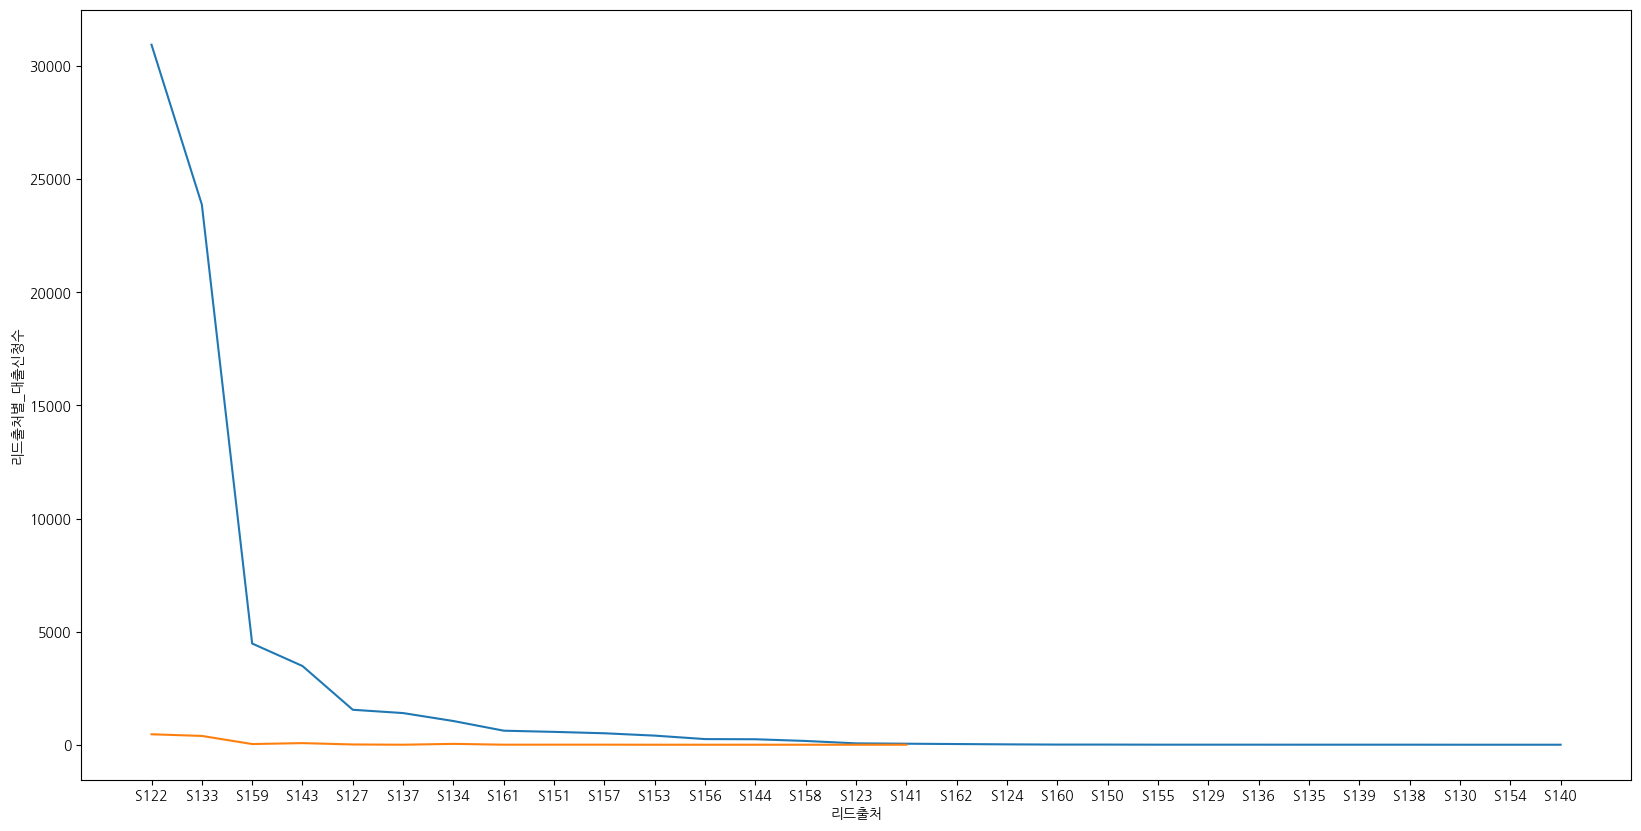

In [95]:
#각 리드 출처 채널별 누적비율 확인
#plt.subplot(2,2)
plt.figure(figsize=[20,10])
sns.lineplot(chk, x='리드출처', y='리드출처별_대출신청수')
sns.lineplot(chk_1, x='리드출처', y='리드출처별_대출신청수')
plt.show()
#상위 3개를 통해 상당히 많은 사람들이 대출을 지원한것 같다.

In [ ]:

plt.figure(figsize=(15, 6))
sns.lineplot(x='cohort_size(month)', y='retention_rate', data=retention, marker='o', hue='cohort', palette='Set2')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#https://wikidocs.net/186273
#https://stackoverflow.com/questions/60992109/valueerror-invalid-elements-received-for-the-data-property
import plotly.graph_objects as pgo #그래프 한곳에 여러개 그리기 

fig2 = pgo.Figure()

#https://wikidocs.net/188204
#plotly로 그리고 summary 확인가능 

#trendline="ols" 불가
for i,v in enumerate(retention['cohort'].unique()):
    fig2.add_trace(pgo.Scatter(x=retention.loc[retention['cohort']==v,'cohort_size(month)'].reset_index(drop=True), y=retention.loc[retention['cohort']==v,'retention_rate'].reset_index(drop=True), name=f'{v}'))
fig2.show()

In [91]:
#단순히 리드 수 만을 기준으로 봤을 때(전체기준)
chk

#상위 3개의 채널을 통해 주로 고객들이 서비스를 찾아온다. 그렇다면 다른 채널들은 굳이 열어둘 필요가 있을지 의문이다. 
#만약 채널을 열어두는데 드는 비용에 비해 채널에 들어오는 사람들이 내는 수익이 그렇지 못하다면 열어둘 필요는 없을 것 같다고 생각할 수 있지만.
#기존의 프로젝트의 목적에는 채널 리드 수를 늘리는 것도 목적이므로 오히려 채널을 닫는것을 제안하는 것은 적합하지 못한듯 하다. 

#만약 채널을 정리한다고 할 경우라면[추가 분석가능]

#그렇다면 3개월 동안 데이터를 수집했는데 10명 미만이 들어온 채널들의 경우 왜 이런것인지 원인을 규명해볼 필요가 있다.
#광고가 부족했을까? 타겟팅이 부족했을까? 단순히 대출신청자의 기준이 미달되어서 그런것일까?(=기준이 미달된 신청자들이 주로 이 채널을 통해 들어오는것은 아닐까?)

,index,리드출처,리드출처별_대출신청수,누적비율
0,0,S122,30941,0.786338
1,3,S133,23877,0.850516
2,4,S159,4474,0.900435
3,1,S143,3480,0.922611
4,6,S127,1546,0.942694
5,5,S137,1400,0.957727
6,2,S134,1048,0.966635
7,13,S161,621,0.974797
8,10,S151,569,0.982069
9,16,S157,507,0.987850


In [92]:
#대출에 성공한 케이스만 확인
chk_1
#대출 승인이 난 고객들의 95%는 상위 3개의 채널을 통해 들어왔다. 

,index,리드출처,리드출처별_대출신청수,누적비율
0,3,S122,463,0.836275
1,1,S133,390,0.906863
2,0,S143,72,0.945098
3,2,S134,39,0.975490
4,4,S159,31,0.987255
5,6,S127,12,0.990196
6,5,S151,3,0.993137
7,8,S157,3,0.995098
8,10,S161,2,0.996078
9,7,S144,1,0.997059


In [ ]:
#대출승인율 확인(대출승인/전체)

#

In [93]:
chk2
#대출 신청자는 B와 G채널만으로 전체의 97%가 지원했다. 

,index,리드출처_카테고리,리드카테고리별_대출신청수,누적비율
0,1,B,29812,0.808027
1,0,G,26518,0.971182
2,2,C,11374,0.986244
3,3,E,1050,0.993373
4,5,D,497,0.999957
5,4,F,459,1.000000
6,6,A,3,1.000000


In [94]:
chk2_1
#대출 B와 G채널만으로 전체의 97%가 지원한다.

#각 카테고리별 대출신청자의 대출승인율 확인 

,index,리드출처_카테고리,리드카테고리별_대출신청수,누적비율
0,0,B,495,0.842157
1,4,G,364,0.979412
2,1,C,140,0.994118
3,3,E,15,1.000000
4,2,F,6,1.000000


In [29]:
train.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

In [37]:
train[['Source','Source_Category','Loan_Amount']]

,Source,Source_Category,Loan_Amount
0,S122,G,NaN
1,S122,G,20000.0
2,S143,B,45000.0
3,S143,B,92000.0
4,S134,B,50000.0
...,...,...,...
69708,S122,G,NaN
69709,S122,G,NaN
69710,S122,G,24000.0
69711,S122,G,80000.0


Loan_Amount                           
             count         sum           mean
Source                                       
S122           388  18681000.0   48146.907216
S127            10    625000.0   62500.000000
S133           323  16259000.0   50337.461300
S134            31   1648000.0   53161.290323
S137             0         0.0            NaN
S141             1    120000.0  120000.000000
S143            58   2597000.0   44775.862069
S144             0         0.0            NaN
S151             3    132000.0   44000.000000
S153             1    140000.0  140000.000000
S157             2     40000.0   20000.000000
S158             1     30000.0   30000.000000
S159            25   1373000.0   54920.000000
S161             2    100000.0   50000.000000

In [51]:
train.loc[train['Approved']==1,['Source','Loan_Amount']].groupby('Source').agg(['count','sum','mean'])

Loan_Amount                           
             count         sum           mean
Source                                       
S122           388  18681000.0   48146.907216
S127            10    625000.0   62500.000000
S133           323  16259000.0   50337.461300
S134            31   1648000.0   53161.290323
S137             0         0.0            NaN
S141             1    120000.0  120000.000000
S143            58   2597000.0   44775.862069
S144             0         0.0            NaN
S151             3    132000.0   44000.000000
S153             1    140000.0  140000.000000
S157             2     40000.0   20000.000000
S158             1     30000.0   30000.000000
S159            25   1373000.0   54920.000000
S161             2    100000.0   50000.000000

In [57]:
#채널별 대출 승인 총액과 인당 평균액
pd.DataFrame(train.loc[train['Approved']==1,['Source','Loan_Amount']].groupby('Source').agg(['count','sum','mean']))['Loan_Amount'].sort_values('mean', ascending=False)
#인당 평균액은 소수가 이용하는 채널의 고객들이 높았다.
#사람들이 많이(300명 이상) 이용한 채널의 평균은 5만 달러 정도로 나타났다.



,count,sum,mean
Source,,,
S153,1,140000.0,140000.000000
S141,1,120000.0,120000.000000
S127,10,625000.0,62500.000000
S159,25,1373000.0,54920.000000
S134,31,1648000.0,53161.290323
S133,323,16259000.0,50337.461300
S161,2,100000.0,50000.000000
S122,388,18681000.0,48146.907216
S143,58,2597000.0,44775.862069
